<div style="background-color: white; color: #FF0000; padding: 20px;">
    <h4> Lớp IE224.P11 - Nhóm 4 </h4>
    <h4> Các thành viên: </h4>
    - Nguyễn Hoàng Duy - MSSV: 22520327 - STT: 35 <br>
    - Trần Thanh Hải - MSSV: 22520392 - STT: 38 <br>
    - Nguyễn Minh Trí - MSSV: 22521522 - STT: 76 <br>
    - Cao Trường Vũ - MSSV: 22521686 - STT: 84 <br>
    <h4> Tên đề tài: </h4>
    Dữ liệu về giải đấu Vô địch Liên Minh Huyền Thoại Hàn Quốc: 
    Thu thập dữ liệu, phân tích thăm dò và dự đoán tỉ lệ chiến thắng của các đội <br>
    <h4> File gồm có 3 mục lớn: </h4>
    - A. Phân tích thăm dò dữ liệu (EDA) <br>
    - B. Tiền xử lý dữ liệu (Preprocessing) <br>
    - C. Xây dựng mô hình (Model) <br>
</div>

<div style="background-color: white; color: #FF0000; padding: 20px;">
<h1>A. Phân tích thăm dò dữ liệu (EDA)</h1>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)        # Show all rows
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.width', None)           # Auto-detect display width
pd.set_option('display.max_colwidth', None)    # Show full content in each cell


## I. Nạp vào và thống kê tổng quan bộ dữ liệu

In [3]:
#Đọc bộ dữ liệu
df = pd.read_csv('../Data/Team_stats_Tournamennts.csv')
df.head(2)

,gameid,datacompleteness,league,year,split,playoffs,date,game,patch,participantid,side,position,teamname,teamid,ban1,ban2,ban3,ban4,ban5,pick1,pick2,pick3,pick4,pick5,gamelength,result,kills,deaths,assists,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,elders,opp_elders,firstherald,heralds,opp_heralds,void_grubs,opp_void_grubs,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,gpr,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,goldat20,xpat20,csat20,opp_goldat20,opp_xpat20,opp_csat20,golddiffat20,xpdiffat20,csdiffat20,killsat20,assistsat20,deathsat20,opp_killsat20,opp_assistsat20,opp_deathsat20,goldat25,xpat25,csat25,opp_goldat25,opp_xpat25,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,LOLTMNT06_13630,complete,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,100,Blue,team,Team BDS,oe:team:7338408a0fe0217451d2c9a567db999,Draven,Bel'Veth,LeBlanc,Jax,Poppy,Kalista,Nocturne,Akali,Pyke,Renekton,1749,0,10,14,11,0.0,0.0,0.0,0.0,1.0,0.3431,0.8233,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,1.0,1.0,3.0,9.0,1.0,1.0,8.0,5.0,0.0,2.0,35171,1206.5523,3303.8765,2168.5763,116,3.9794,54,1.8525,31,273,9.3654,51656,32438,1112.7959,50075,-0.010825,1.05,793.0,212,34.4768,17959.0,18342.0,320.0,17077.0,18109.0,323.0,882.0,233.0,-3.0,5.0,5.0,4.0,4.0,6.0,5.0,27653.0,28686.0,509.0,25924.0,29282.0,514.0,1729.0,-596.0,-5.0,6.0,7.0,5.0,5.0,8.0,6.0,36502.0,40338.0,724.0,34086.0,40490.0,717.0,2416.0,-152.0,7.0,6.0,7.0,5.0,5.0,8.0,6.0,45581.0,53080.0,904.0,44394.0,55632.0,899.0,1187.0,-2552.0,5.0,9.0,10.0,7.0,7.0,12.0,9.0
1,LOLTMNT06_13630,complete,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,200,Red,team,G2 Esports,oe:team:7d6673d3a9d00363c6bebc1a630da6e,Caitlyn,Ashe,Rumble,Blitzcrank,Bard,Neeko,Aphelios,Renata Glasc,Vi,Gwen,1749,1,14,10,26,4.0,0.0,0.0,0.0,0.0,0.4803,0.8233,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,9.0,3.0,0.0,0.0,5.0,8.0,2.0,0.0,66376,2277.0497,2128.2333,2434.1681,109,3.7393,48,1.6467,32,218,7.4786,56807,37589,1289.5026,50620,0.010825,-1.05,825.0,191,34.8542,17077.0,18109.0,323.0,17959.0,18342.0,320.0,-882.0,-233.0,3.0,4.0,6.0,5.0,5.0,5.0,4.0,25924.0,29282.0,514.0,27653.0,28686.0,509.0,-1729.0,596.0,5.0,5.0,8.0,6.0,6.0,7.0,5.0,34086.0,40490.0,717.0,36502.0,40338.0,724.0,-2416.0,152.0,-7.0,5.0,8.0,6.0,6.0,7.0,5.0,44394.0,55632.0,899.0,45581.0,53080.0,904.0,-1187.0,2552.0,-5.0,7.0,12.0,9.0,9.0,10.0,7.0


In [4]:
df.dtypes

gameid                       object
datacompleteness             object
league                       object
year                          int64
split                        object
playoffs                      int64
date                         object
game                          int64
patch                       float64
participantid                 int64
side                         object
position                     object
teamname                     object
teamid                       object
ban1                         object
ban2                         object
ban3                         object
ban4                         object
ban5                         object
pick1                        object
pick2                        object
pick3                        object
pick4                        object
pick5                        object
gamelength                    int64
result                        int64
kills                         int64
deaths                      

**Vì số lượng đặc trưng là rất lớn (148 cột). Bọn em thống nhất quyết định rằng ở đồ án cuối kỳ này, bọn em sẽ chỉ tập trung vào phân tích theo 1 giải đấu duy nhất là giải LCK.**

In [5]:
#Lọc dữ liệu theo giải LCK 
lck_df = df[df['league'] =='LCK']
lck_df.head(2)

,gameid,datacompleteness,league,year,split,playoffs,date,game,patch,participantid,side,position,teamname,teamid,ban1,ban2,ban3,ban4,ban5,pick1,pick2,pick3,pick4,pick5,gamelength,result,kills,deaths,assists,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,elders,opp_elders,firstherald,heralds,opp_heralds,void_grubs,opp_void_grubs,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,gpr,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,goldat20,xpat20,csat20,opp_goldat20,opp_xpat20,opp_csat20,golddiffat20,xpdiffat20,csdiffat20,killsat20,assistsat20,deathsat20,opp_killsat20,opp_assistsat20,opp_deathsat20,goldat25,xpat25,csat25,opp_goldat25,opp_xpat25,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
38,LOLTMNT02_22165,complete,LCK,2024,Spring,0,2024-01-17 08:20:00,1,14.01,100,Blue,team,DRX,oe:team:101f8589e58c724c1dcd5a9c1555277,K'Sante,Kalista,LeBlanc,Skarner,Sejuani,Lucian,Orianna,Nami,Poppy,Udyr,2507,0,14,14,28,0.0,0.0,0.0,0.0,1.0,0.3351,0.6701,0.0,3.0,4.0,3.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,3.0,1.0,3.0,9.0,0.0,1.0,6.0,1.0,0.0,2.0,107963,2583.8771,3484.7387,5798.1013,139,3.3267,71,1.6992,53,357,8.5441,72714,45765,1095.2932,71150,-0.004781,1.1,1136.0,195,31.8548,16277.0,19016.0,360.0,14694.0,18973.0,317.0,1583.0,43.0,43.0,1.0,1.0,0.0,0.0,0.0,1.0,26441.0,30529.0,562.0,22526.0,29121.0,488.0,3915.0,1408.0,74.0,3.0,3.0,1.0,1.0,1.0,3.0,35781.0,43117.0,759.0,30979.0,41284.0,687.0,4802.0,1833.0,72.0,5.0,4.0,2.0,2.0,3.0,5.0,44062.0,53314.0,881.0,42714.0,56073.0,843.0,1348.0,-2759.0,38.0,8.0,13.0,5.0,5.0,10.0,8.0
39,LOLTMNT02_22165,complete,LCK,2024,Spring,0,2024-01-17 08:20:00,1,14.01,200,Red,team,Nongshim RedForce,oe:team:5cd2cd09ec94296f605dd13a2924d6c,Ashe,Varus,Vi,Nocturne,Lee Sin,Milio,Azir,Aphelios,Jax,Gnar,2507,1,14,14,32,1.0,0.0,0.0,0.0,0.0,0.3351,0.6701,1.0,4.0,3.0,4.0,3.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,9.0,3.0,1.0,0.0,1.0,6.0,2.0,0.0,119941,2870.5465,3444.5313,3839.4974,154,3.6857,68,1.6274,69,370,8.8552,78964,52015,1244.8744,71491,0.004781,-1.1,1124.0,260,33.1233,14694.0,18973.0,317.0,16277.0,19016.0,360.0,-1583.0,-43.0,-43.0,0.0,0.0,1.0,1.0,1.0,0.0,22526.0,29121.0,488.0,26441.0,30529.0,562.0,-3915.0,-1408.0,-74.0,1.0,1.0,3.0,3.0,3.0,1.0,30979.0,41284.0,687.0,35781.0,43117.0,759.0,-4802.0,-1833.0,-72.0,2.0,3.0,5.0,5.0,4.0,2.0,42714.0,56073.0,843.0,44062.0,53314.0,881.0,-1348.0,2759.0,-38.0,5.0,10.0,8.0,8.0,13.0,5.0


In [6]:
# lck_df.to_csv('../Data/LCK_Tournament.csv')

lck_df = pd.read_csv('../Data/LCK_Tournament.csv')

### I.1 Kiểm tra dữ liệu khuyết

In [7]:
# Kiểm tra tổng số giá trị khuyết trong từng cột
missing_values = lck_df.isnull().sum()

# Hiển thị các cột có giá trị khuyết (nếu có)
missing_columns = missing_values[missing_values > 0]

if len(missing_columns) > 0:
    print("Các cột có giá trị khuyết:")
    print(missing_columns)
    
    # Tính phần trăm giá trị khuyết
    missing_percentage = (missing_columns / len(lck_df)) * 100
    print("\nPhần trăm giá trị khuyết:")
    print(missing_percentage)
else:
    print("Không có giá trị khuyết trong dataset")

# Xuất ra dòng dữ liệu có chứa giá trị khuyết đó (chỉ xuất các thông tin định danh như gameid, ngày thi đấu, tên đội)
# Tìm kiếm các dòng có chứa giá trị khuyết
rows_with_missing_values = lck_df[lck_df.isnull().any(axis=1)]

# Xuất ra các thông tin định danh của các dòng có chứa giá trị khuyết
print(rows_with_missing_values[['gameid', 'date', 'teamname']])

Các cột có giá trị khuyết:
ban5    1
dtype: int64

Phần trăm giá trị khuyết:
ban5    0.103734
dtype: float64
               gameid                 date   teamname
941  LOLTMNT03_145472  2024-09-01 07:11:01  Dplus KIA


**Nhận xét:** 
- Bộ dữ liệu về các ván đấu ghi nhận ở giải đáu LCK chỉ bị khuyết ở 1 ô dữ liệu duy nhất là 1 lượt ban trong 1 ván đấu. 
- Chúng em đã tiến hành kiểm chứng thực tế thì biết được ghi nhận trên là hoàn toàn chính xác, vì thật sự đội đã bỏ qua lượt ban ấy và không cấm tướng.

### I.2 Tổng quan bộ dữ liệu

In [10]:
#Sử dụng thư viện prettytable để có kết quả hiển thị đẹp hơn
from prettytable import PrettyTable

def analyze_dataset(df):
    # 1. Thông tin cơ bản
    basic_info = PrettyTable()
    basic_info.title = "THÔNG TIN CƠ BẢN"
    basic_info.field_names = ["Metrics", "Value"]
    basic_info.add_row(["Số dòng", f"{df.shape[0]:,}"])
    basic_info.add_row(["Số cột", f"{df.shape[1]:,}"])
    basic_info.add_row(["Memory Usage", f"{df.memory_usage().sum() / 1024**2:.2f} MB"])
    
    # 2. Phân loại kiểu dữ liệu
    dtype_counts = df.dtypes.value_counts()
    dtype_info = PrettyTable()
    dtype_info.title = "PHÂN LOẠI KIỂU DỮ LIỆU"
    dtype_info.field_names = ["Kiểu dữ liệu", "Số lượng cột"]
    for dtype, count in dtype_counts.items():
        dtype_info.add_row([dtype, count])
    
    # 3. Thống kê giá trị thiếu
    missing_info = PrettyTable()
    missing_info.title = "THỐNG KÊ GIÁ TRỊ THIẾU"
    missing_info.field_names = ["Cột", "Số giá trị thiếu", "Tỉ lệ (%)"]
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
    for col, count in missing_data.items():
        percentage = (count / len(df)) * 100
        missing_info.add_row([col, count, f"{percentage:.2f}%"])
    
    # # 4. Nhóm các cột theo prefix
    # column_groups = {}
    # for col in df.columns:
    #     prefix = col.split('_')[0] if '_' in col else 'other'
    #     if prefix not in column_groups:
    #         column_groups[prefix] = []
    #     column_groups[prefix].append(col)
    
    # group_info = PrettyTable()
    # group_info.title = "NHÓM CÁC CỘT LIÊN QUAN"
    # group_info.field_names = ["Nhóm", "Số lượng cột", "Danh sách cột"]
    # for prefix, cols in column_groups.items():
    #     group_info.add_row([prefix, len(cols), "\n".join(cols)])
    
    # In kết quả
    print(basic_info)
    print("\n" + "="*80 + "\n")
    print(dtype_info)
    print("\n" + "="*80 + "\n")
    print(missing_info)
    print("\n" + "="*80 + "\n")
    
    # create excel file
    # Chuyển đổi PrettyTable thành DataFrame trước khi xuất ra Excel
    def table_to_dataframe(table):
        return pd.DataFrame(table._rows, columns=table.field_names)

    # Xuất ra Excel
    with pd.ExcelWriter("../Data/data_analysis.xlsx") as writer:
        # Chuyển đổi từng bảng thành DataFrame và ghi vào Excel
        table_to_dataframe(basic_info).to_excel(
            writer, 
            sheet_name="Thông tin cơ bản",
            index=False
        )
        
        table_to_dataframe(dtype_info).to_excel(
            writer, 
            sheet_name="Phân loại kiểu dữ liệu",
            index=False
        )
        
        table_to_dataframe(missing_info).to_excel(
            writer, 
            sheet_name="Thống kê giá trị thiếu",
            index=False
        )
        
    # print(group_info)

# Sử dụng hàm
analyze_dataset(lck_df)

+------------------------+
|    THÔNG TIN CƠ BẢN    |
+--------------+---------+
|   Metrics    |  Value  |
+--------------+---------+
|   Số dòng    |   964   |
|    Số cột    |   147   |
| Memory Usage | 1.08 MB |
+--------------+---------+


+-----------------------------+
|    PHÂN LOẠI KIỂU DỮ LIỆU   |
+--------------+--------------+
| Kiểu dữ liệu | Số lượng cột |
+--------------+--------------+
|   float64    |     109      |
|    int64     |      19      |
|    object    |      19      |
+--------------+--------------+


+-------------------------------------+
|        THỐNG KÊ GIÁ TRỊ THIẾU       |
+------+------------------+-----------+
| Cột  | Số giá trị thiếu | Tỉ lệ (%) |
+------+------------------+-----------+
| ban5 |        1         |   0.10%   |
+------+------------------+-----------+




### I.3 Chia các đặc trưng thành từng nhóm 1 để dễ phân tích

In [10]:
# 1. Thống kê các cột cơ bản về trận đấu
game_basic_cols = ['gameid', 'league', 'year', 'split', 'playoffs', 'date', 'game', 'patch', 'gamelength', 'result']

# 2. Thống kê về đội (Team Identity)
team_identity_cols = ['participantid', 'side', 'position', 'teamname', 'teamid']

# 3. Thống kê về picks & bans
draft_cols = ['ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'pick1', 'pick2', 'pick3', 'pick4', 'pick5']

# 4. Thống kê về KDA và combat
combat_cols = ['kills', 'deaths', 'assists', 'doublekills', 'triplekills', 'quadrakills', 'pentakills', 'firstblood', 'team kpm', 'ckpm']

# 5. Thống kê về objectives
objectives_cols = ['firstdragon', 'dragons', 'opp_dragons', 'elementaldrakes', 'opp_elementaldrakes',
                  'infernals', 'mountains', 'clouds', 'oceans', 'chemtechs', 'hextechs', 'elders',
                  'firstherald', 'heralds', 'firstbaron', 'barons']

# 6. Thống kê về towers và inhibitors
structure_cols = ['firsttower', 'towers', 'opp_towers', 'firstmidtower', 'firsttothreetowers',
                 'turretplates', 'opp_turretplates', 'inhibitors', 'opp_inhibitors']

# 7. Thống kê về damage và vision
damage_vision_cols = ['damagetochampions', 'dpm', 'damagetakenperminute', 'damagemitigatedperminute',
                     'wardsplaced', 'wpm', 'wardskilled', 'wcpm', 'controlwardsbought', 'visionscore', 'vspm']

# 8. Thống kê về gold và resources
economy_cols = ['totalgold', 'earnedgold', 'earned gpm', 'goldspent', 'gspd', 'gpr',
                'minionkills', 'monsterkills', 'cspm']

## II. Thực hiện phân tích thăm dò cho từng nhóm đặc trưng (EDA)

### II.1. Các thông số cơ bản của một ván đấu
- game_basic_cols = ['gameid', 'league', 'year', 'split', 'playoffs', 'date', 'game', 'patch', 'gamelength', 'result']

In [11]:
# Copy df để tiện thay đổi
lck_data = lck_df.copy()

#### a. Thống kê số lượng ván đấu theo mùa giải

<Figure size 1200x600 with 0 Axes>

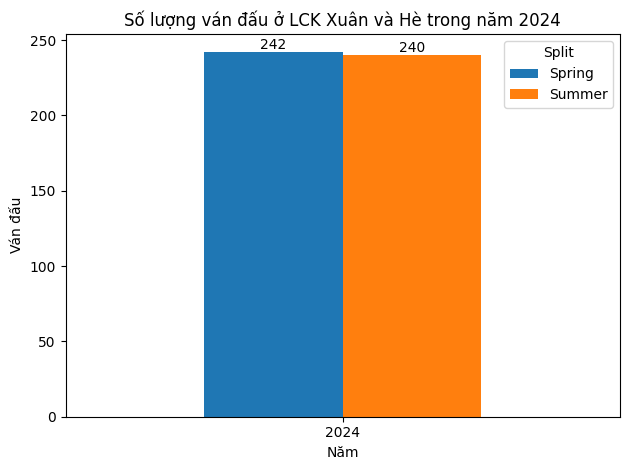

In [12]:
# Thống kê số lượng ván đấu 
plt.figure(figsize=(12, 6))
split_counts = lck_df.groupby(['year', 'split']).size().unstack(fill_value=0) // 2 
bars = split_counts.plot(kind='bar', stacked=False)
plt.title('Số lượng ván đấu ở LCK Xuân và Hè trong năm 2024')
plt.xlabel('Năm')
plt.ylabel('Ván đấu')
plt.legend(title='Split')
plt.xticks(rotation=0)

# Displaying values on top of each column
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), bar.get_height(), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### b. Thống kê số lượng ván đấu theo patch (bản cập nhật)

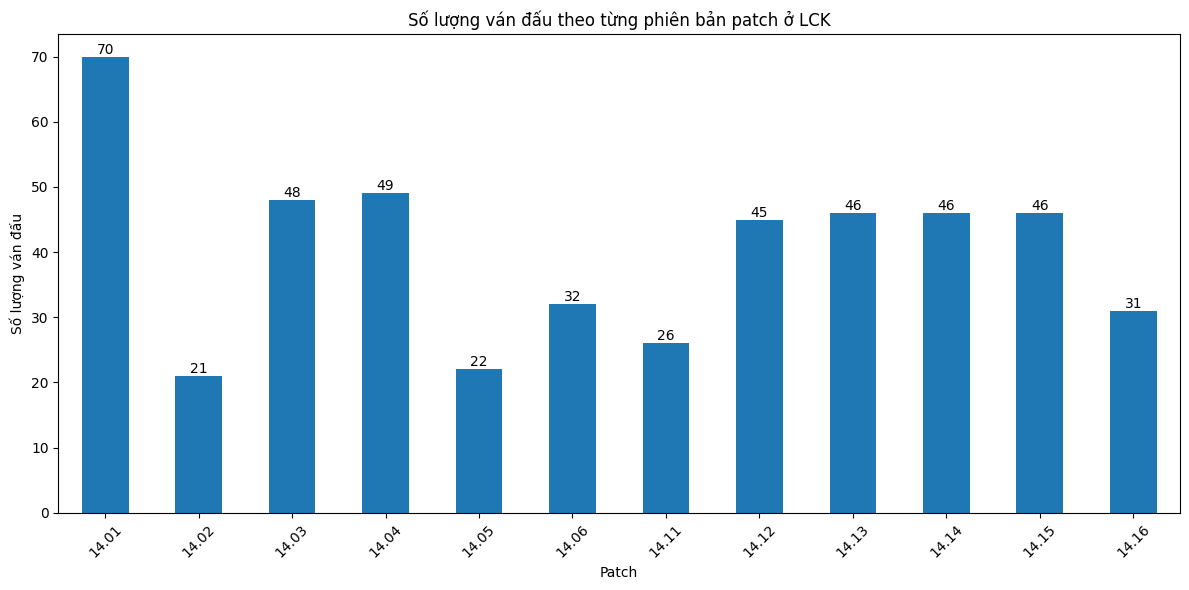

In [13]:
# Thống kê số lượng ván đấu theo patch
plt.figure(figsize=(12, 6))

# Đếm số lượng ván đấu cho mỗi patch và chia 2 vì mỗi trận có 2 bản ghi
patch_counts = lck_df['patch'].value_counts().sort_index() // 2

# Vẽ biểu đồ cột
bars = patch_counts.plot(kind='bar')
plt.title('Số lượng ván đấu theo từng phiên bản patch ở LCK')
plt.xlabel('Patch')
plt.ylabel('Số lượng ván đấu')

# Hiển thị giá trị trên đỉnh mỗi cột
for i, v in enumerate(patch_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### c. Thống kê ván đấu theo time-series

c:\Users\NguyễnHoàngDuy\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\groupby\grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)


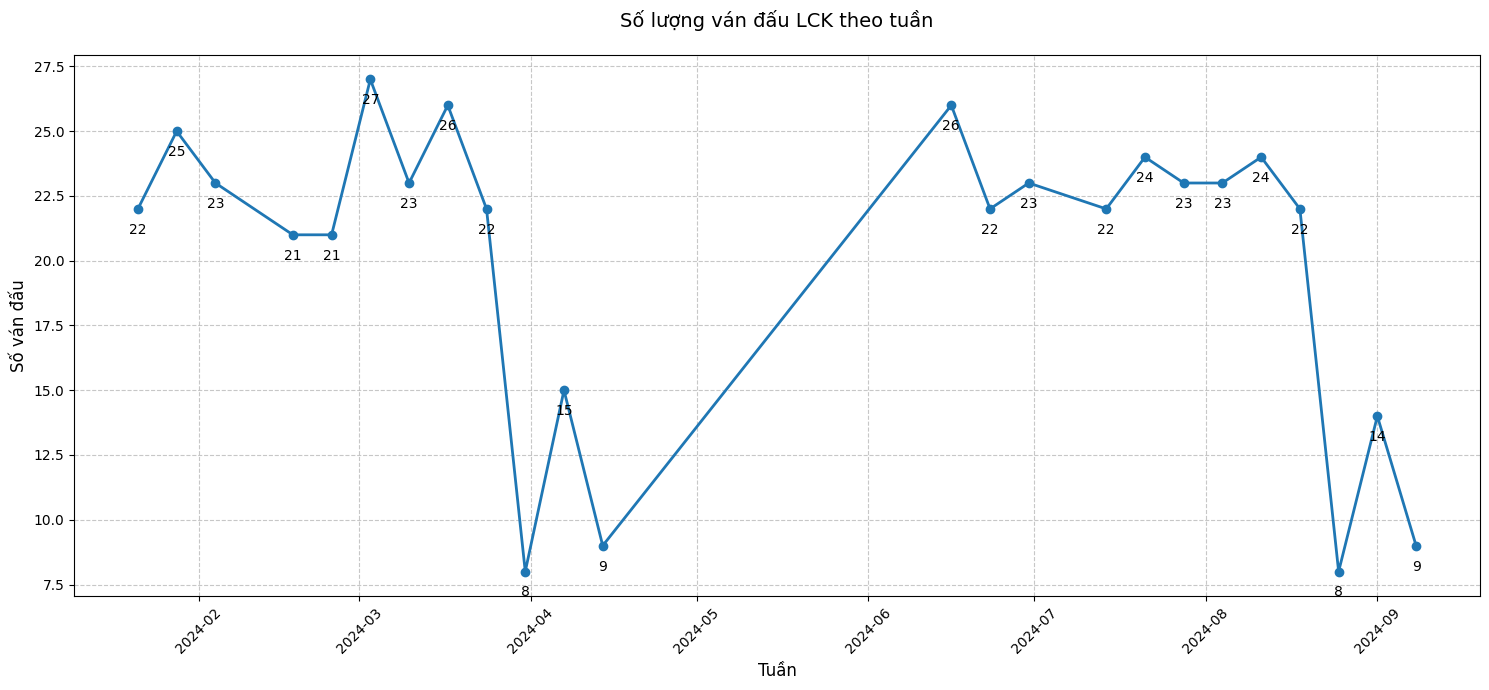


Thống kê theo tuần:
Tổng số tuần thi đấu: 24
Trung bình số trận mỗi tuần: 20.08
Số trận nhiều nhất trong một tuần: 27
Số trận ít nhất trong một tuần: 8


In [14]:
# Đổi kiểu đữ liệu 'date'
lck_data.loc[:, 'date'] = pd.to_datetime(lck_data['date'])

# Tạo figure
plt.figure(figsize=(15, 7))

# Gom nhóm theo từng tuần
weekly_games = lck_data.groupby(pd.Grouper(key='date', freq='W')).size() // 2

# Loại bỏ các tuần không có trận đấu
weekly_games = weekly_games[weekly_games > 0]

# Tạo biểu đồ time-series
plt.plot(weekly_games.index, weekly_games.values, marker='o', linewidth=2)

# Điều chỉnh biểu đồ
plt.title('Số lượng ván đấu LCK theo tuần', pad=20, fontsize=14)
plt.xlabel('Tuần', fontsize=12)
plt.ylabel('Số ván đấu', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Thêm nhãn giá trị lên đầu mỗi điểm 
for x, y in zip(weekly_games.index, weekly_games.values):
    plt.annotate(str(int(y)), 
                (x, y),
                textcoords="offset points", 
                xytext=(0,-10), 
                ha='center',
                va='top')

plt.tight_layout()
plt.show()

# In thông số
print("\nThống kê theo tuần:")
print(f"Tổng số tuần thi đấu: {len(weekly_games)}")
print(f"Trung bình số trận mỗi tuần: {weekly_games.mean():.2f}")
print(f"Số trận nhiều nhất trong một tuần: {weekly_games.max()}")
print(f"Số trận ít nhất trong một tuần: {weekly_games.min()}")

#### d. Phân tích độ dài ván đấu 'gamelength'

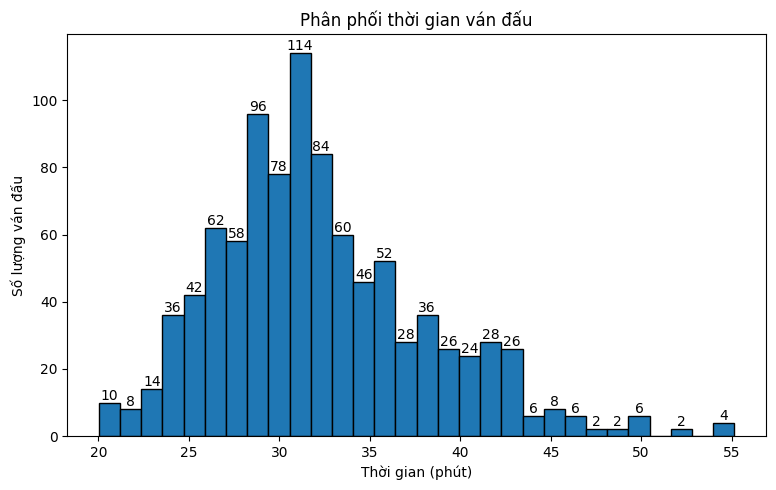

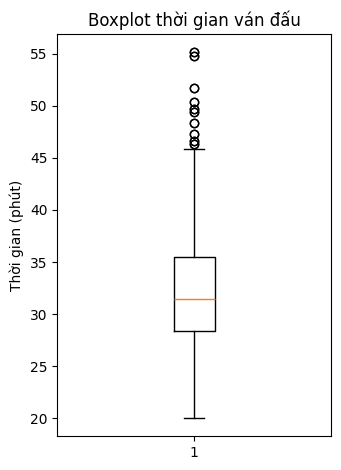


Thống kê thời gian ván đấu:
Trung bình: 32 phút 16 giây
Ngắn nhất: 20 phút 2 giây
Dài nhất: 55 phút 9 giây

Phân vị thời gian:
Phân vị 25%: 28 phút 24 giây
Phân vị 50%: 31 phút 27 giây
Phân vị 75%: 35 phút 30 giây

Thời gian phổ biến nhất: 32 phút 19 giây
Độ lệch chuẩn: 5 phút 51 giây


In [15]:
# Hàm chuyển đổi giây sang định dạng "X phút Y giây"
def format_time(seconds):
    minutes = seconds // 60
    remaining_seconds = seconds % 60
    return f"{int(minutes)} phút {int(remaining_seconds)} giây"

# Tạo figure với 2 subplots
plt.figure(figsize=(15, 5))

# Subplot 1: Histogram
plt.subplot(1, 2, 1)
# Tạo histogram và lưu thông tin về bars
counts, bins, patches = plt.hist(lck_data['gamelength']/60, bins=30, edgecolor='black')

# Thêm nhãn giá trị lên đầu mỗi bar
for count, patch in zip(counts, patches):
    if count > 0:  # Chỉ hiển thị nhãn nếu có giá trị
        plt.text(patch.get_x() + patch.get_width()/2,  # x position
                count,                                  # y position
                int(count),                            # label (converted to integer)
                ha='center',                           # horizontal alignment
                va='bottom')                           # vertical alignment

plt.title('Phân phối thời gian ván đấu')
plt.xlabel('Thời gian (phút)')
plt.ylabel('Số lượng ván đấu')
plt.tight_layout()
plt.show()

# Subplot 2: Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(lck_data['gamelength']/60)
plt.title('Boxplot thời gian ván đấu')
plt.ylabel('Thời gian (phút)')

plt.tight_layout()
plt.show()

# In thống kê với định dạng thời gian mới
print("\nThống kê thời gian ván đấu:")
mean_time = format_time(lck_data['gamelength'].mean())
min_time = format_time(lck_data['gamelength'].min())
max_time = format_time(lck_data['gamelength'].max())

print(f"Trung bình: {mean_time}")
print(f"Ngắn nhất: {min_time}")
print(f"Dài nhất: {max_time}")

# Thêm phân tích phân vị
percentiles = [25, 50, 75]
print("\nPhân vị thời gian:")
for p in percentiles:
    time_p = format_time(np.percentile(lck_data['gamelength'], p))
    print(f"Phân vị {p}%: {time_p}")

# Tính mode (thời gian phổ biến nhất)
mode_time = format_time(lck_data['gamelength'].mode().iloc[0])
print(f"\nThời gian phổ biến nhất: {mode_time}")

# Tính độ lệch chuẩn
std_time = format_time(lck_data['gamelength'].std())
print(f"Độ lệch chuẩn: {std_time}")

#### e. Tỷ lệ thắng theo đội Xanh/ đội Đỏ ('side') ở mỗi mùa

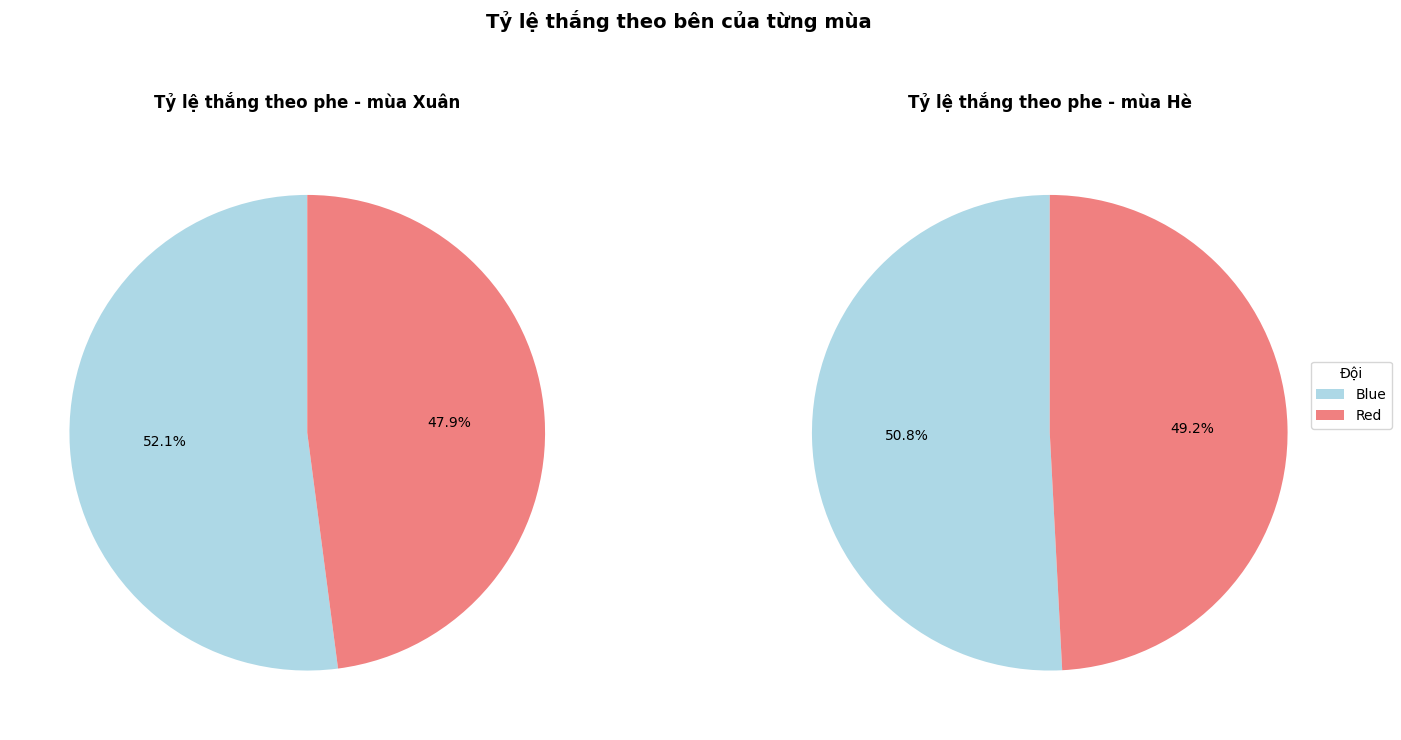

In [16]:
# Tính tỷ lệ thắng theo phe và split
split_side_winrate = lck_data.groupby(['split', 'side'])['result'].mean() * 100
split_side_winrate = split_side_winrate.unstack()  # Chuyển split thành index

# Tạo figure với 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Vẽ biểu đồ tròn cho Spring
spring_data = split_side_winrate.loc['Spring']
ax1.pie(spring_data, autopct='%1.1f%%',
        colors=['lightblue', 'lightcoral'], startangle=90)
ax1.set_title('Tỷ lệ thắng theo phe - mùa Xuân', pad=20, size=12, weight='bold')

# Vẽ biểu đồ tròn cho Summer
summer_data = split_side_winrate.loc['Summer']
ax2.pie(summer_data, autopct='%1.1f%%',
        colors=['lightblue', 'lightcoral'], startangle=90)
ax2.set_title('Tỷ lệ thắng theo phe - mùa Hè', pad=20, size=12, weight='bold')

# Thêm chú thích chung
fig.legend(['Blue', 'Red'], 
          title='Đội',
          loc='center right',
          bbox_to_anchor=(0.98, 0.5))

# Thêm tiêu đề chung
fig.suptitle('Tỷ lệ thắng theo bên của từng mùa', size=14, weight='bold', y=1.05)

plt.tight_layout()
plt.show()


### 2. Thống kê theo các đội tuyển
- team_identity_cols = ['participantid', 'side', 'position', 'teamname', 'teamid']

In [17]:
# Copy df để tiện thay đổi
lck_data = lck_df.copy()

#### a. Thống kê số lượng ván đấu, tỉ lệ chọn bên theo mỗi đội 

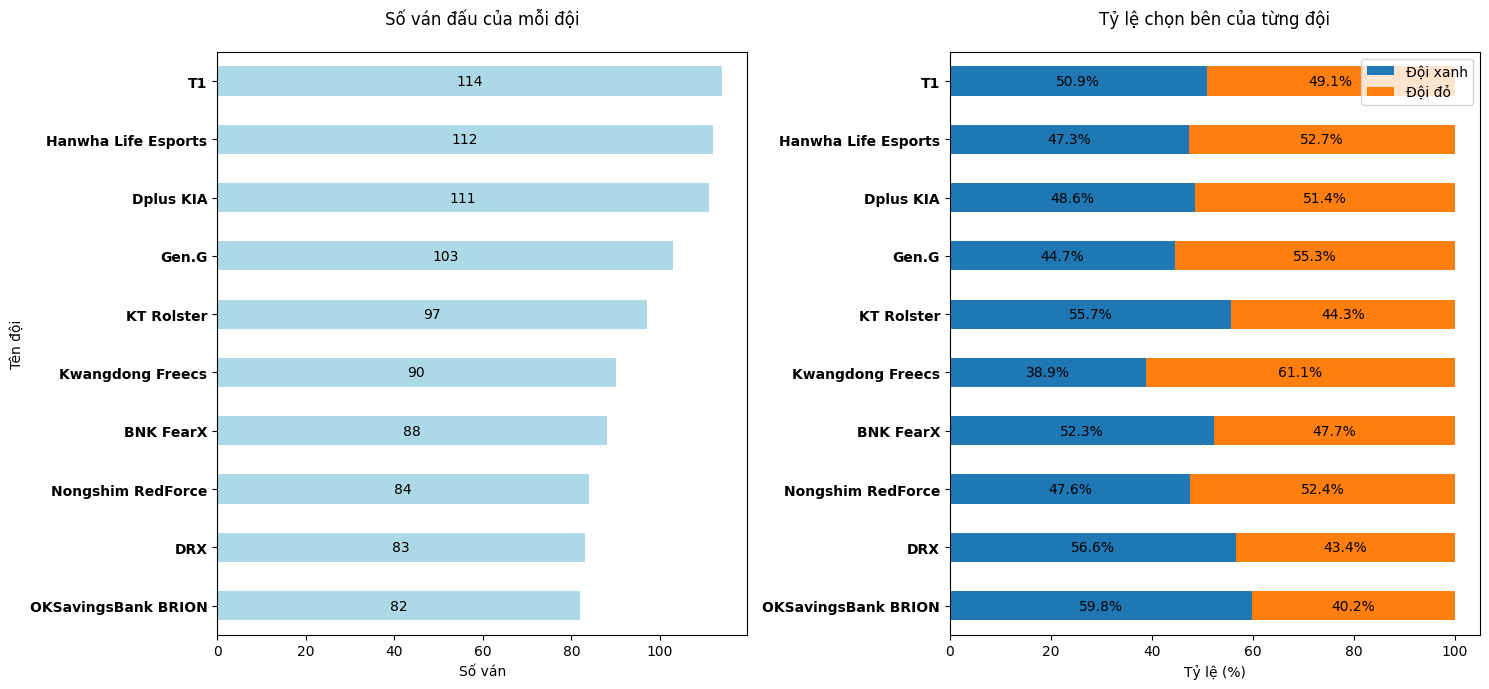

In [18]:
# Thống kê số lượng trận của mỗi đội
team_counts = lck_data['teamname'].value_counts().sort_values(ascending=True)  # Sắp xếp tăng dần

# Tính tỷ lệ xuất hiện ở mỗi bên của từng đội
team_side_distribution = pd.crosstab(lck_data['teamname'], lck_data['side'], normalize='index') * 100
team_side_distribution = team_side_distribution.reindex(team_counts.index)  # Sắp xếp theo thứ tự giống team_counts

# Tạo figure với 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# 1. Biểu đồ số trận của mỗi đội - dạng ngang
bars = team_counts.plot(kind='barh', ax=ax1, color='lightblue')
ax1.set_title('Số ván đấu của mỗi đội', pad=20)
ax1.set_xlabel('Số ván')
ax1.set_ylabel('Tên đội')
ax1.set_yticklabels(ax1.get_yticklabels(), weight='bold')

# Thêm nhãn giá trị vào giữa mỗi thanh
for i, v in enumerate(team_counts):
    ax1.text(v/2, i, str(v), 
             ha='center',    # Căn giữa theo chiều ngang
             va='center',    # Căn giữa theo chiều dọc
             color='black')

# 2. Biểu đồ tỷ lệ xuất hiện ở mỗi bên
ax = team_side_distribution.plot(kind='barh', ax=ax2, stacked=True)
ax2.set_title('Tỷ lệ chọn bên của từng đội', pad=20)
ax2.set_xlabel('Tỷ lệ (%)')
ax2.set_ylabel('')
ax2.legend(['Đội xanh', 'Đội đỏ'])
ax2.set_yticklabels(ax1.get_yticklabels(), weight='bold')

# Thêm nhãn giá trị vào giữa mỗi phần của thanh
for i in range(len(team_side_distribution)):
    # Tính toán vị trí cho blue side (bắt đầu từ 0)
    blue_width = team_side_distribution.iloc[i, 0]
    ax2.text(blue_width/2, i, f"{blue_width:.1f}%",
             ha='center', va='center',
             color='black')
    
    # Tính toán vị trí cho red side (bắt đầu từ blue_width)
    red_width = team_side_distribution.iloc[i, 1]
    ax2.text(blue_width + red_width/2, i, f"{red_width:.1f}%",
             ha='center', va='center',
             color='black')

plt.tight_layout()
plt.show()



#### b. Thống kê số lượng ván đấu ở vòng bảng và playoffs của mỗi đội

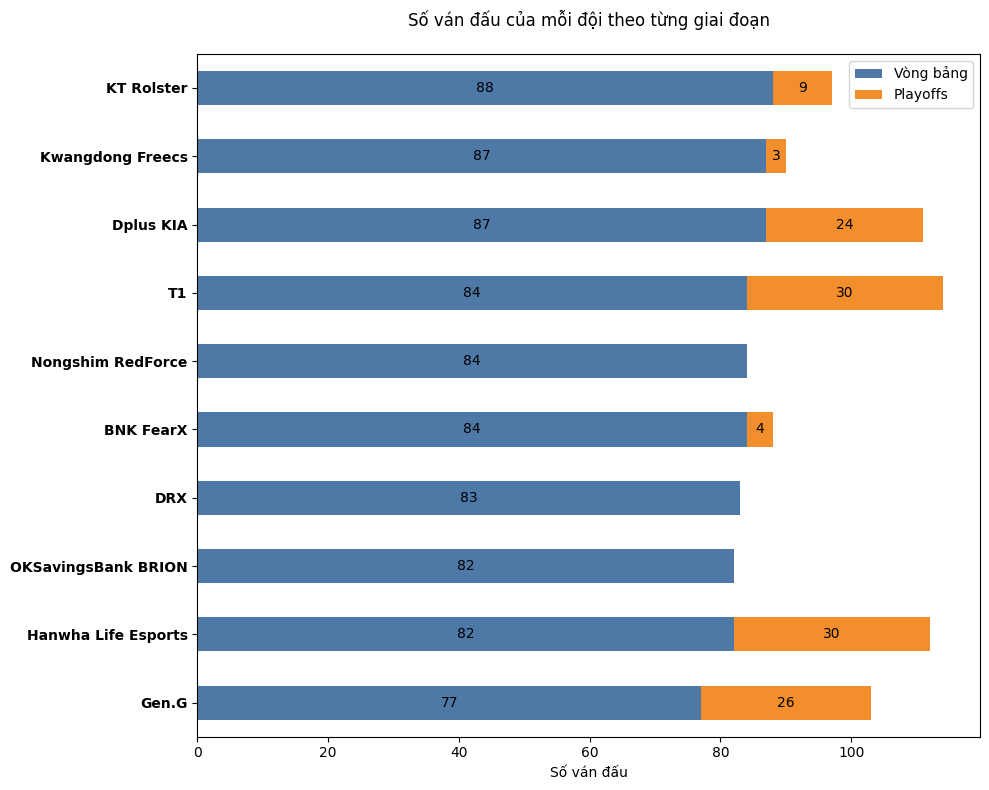

In [19]:
# Tạo DataFrame thống kê số trận theo đội và playoffs
team_playoff_counts = pd.crosstab(lck_data['teamname'], lck_data['playoffs'])
team_playoff_counts.columns = ['Vòng bảng', 'Playoffs']  # Đổi tên cột cho dễ hiểu
team_playoff_counts = team_playoff_counts.sort_values('Vòng bảng', ascending=True)  # Sắp xếp theo số trận vòng bảng

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 8))
bars = team_playoff_counts.plot(kind='barh', ax=ax, stacked=True, 
                              color=['#4e79a7', '#f28e2b'])

# Chỉnh sửa biểu đồ
ax.set_title('Số ván đấu của mỗi đội theo từng giai đoạn', pad=20)
ax.set_xlabel('Số ván đấu')
ax.set_ylabel('') 
ax.set_yticklabels(ax.get_yticklabels(), weight='bold')
ax.legend(title='')

# Thêm nhãn giá trị vào mỗi phần của thanh
for i in range(len(team_playoff_counts)):
    # Vòng bảng
    regular_matches = team_playoff_counts.iloc[i, 0]
    if regular_matches > 0:
        ax.text(regular_matches/2, i, str(regular_matches),
                ha='center', va='center', color='black')
    
    # Playoffs
    playoff_matches = team_playoff_counts.iloc[i, 1]
    if playoff_matches > 0:
        ax.text(regular_matches + playoff_matches/2, i, str(playoff_matches),
                ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

#### c. Kết hợp với 'results' và 'playoffs', thống kê tỉ lệ thắng của mỗi đội theo từng mùa trong vòng bảng

<Figure size 1400x800 with 0 Axes>

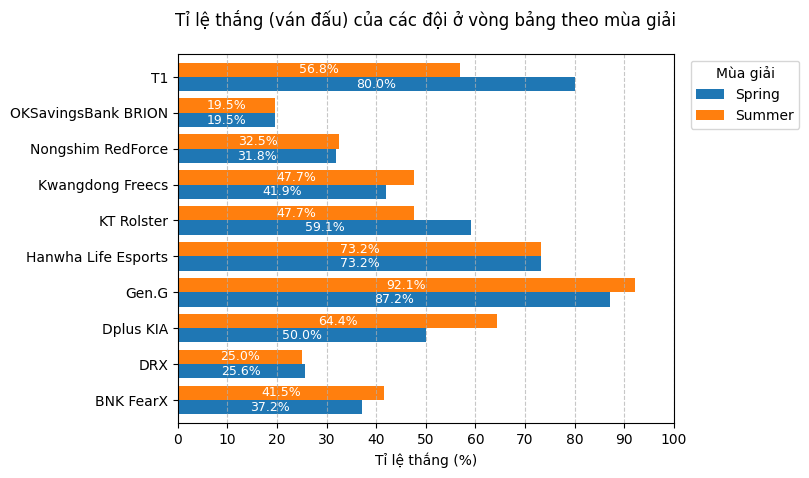

In [20]:
# Lọc dữ liệu chỉ lấy vòng bảng
regular_season = lck_data[lck_data['playoffs'] == False]

# Tính tỷ lệ thắng theo đội và mùa
team_season_winrate = regular_season.groupby(['teamname', 'split'])['result'].agg(['count', 'mean']).round(3)
team_season_winrate['winrate_pct'] = (team_season_winrate['mean'] * 100).round(1)

# Tạo pivot table để dễ dàng so sánh
winrate_pivot = team_season_winrate['winrate_pct'].unstack()

# Tạo biểu đồ với kích thước rộng hơn
plt.figure(figsize=(14, 8))

# Vẽ biểu đồ cột ngang
ax = winrate_pivot.plot(kind='barh', width=0.8)

# Chỉnh sửa biểu đồ
plt.title('Tỉ lệ thắng (ván đấu) của các đội ở vòng bảng theo mùa giải', pad=20, fontsize=12)
plt.xlabel('Tỉ lệ thắng (%)', fontsize=10)
plt.ylabel('')

# Thiết lập giới hạn trục x từ 0 đến 100
plt.xlim(0, 100)

# Thêm các mốc chia trục x
plt.xticks(range(0, 101, 10))

# Chỉnh sửa legend
plt.legend(title='Mùa giải', bbox_to_anchor=(1.02, 1), loc='upper left')

# Thêm lưới ngang để dễ đọc
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Thêm nhãn giá trị vào giữa cột
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', color='white', fontsize=9)


plt.show()


### 3. Thống kê ban/pick
- draft_cols = ['ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'pick1', 'pick2', 'pick3', 'pick4', 'pick5']

#### a. Thống kê top 10 tướng thường xuyên bị cấm nhất ở mỗi mùa

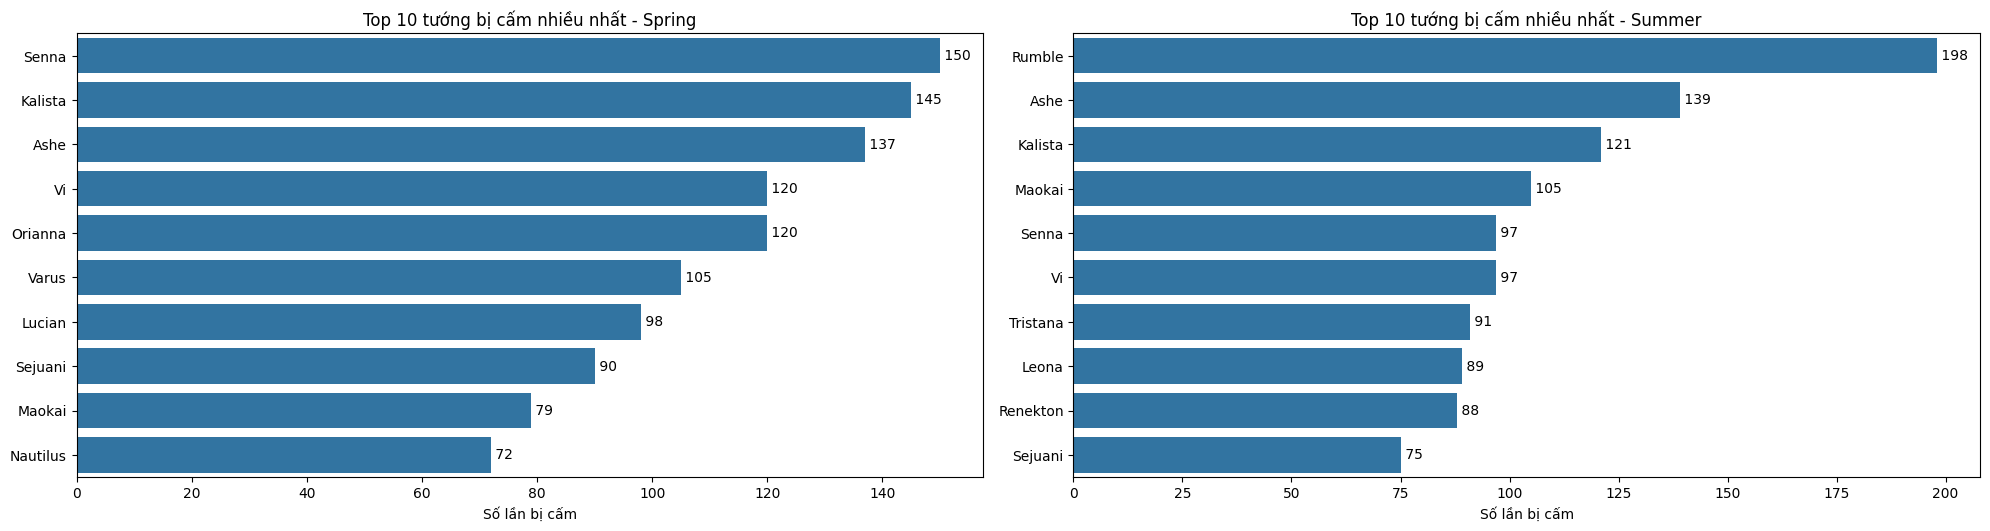

In [21]:
# Tạo figure với kích thước lớn hơn để chứa các subplots
plt.figure(figsize=(20, 10))

# Lấy danh sách các mùa giải unique
splits = sorted(lck_data['split'].unique())

# Tạo subplot cho mỗi mùa giải
for idx, split in enumerate(splits, 1):
    # Lọc dữ liệu cho mùa giải hiện tại
    split_data = lck_data[lck_data['split'] == split]
    
    # Gộp tất cả các lượt cấm cho mùa này
    split_bans = pd.concat([split_data[ban] for ban in ['ban1', 'ban2', 'ban3', 'ban4', 'ban5']])
    ban_counts = split_bans.value_counts().head(10)
    
    # Tạo subplot
    plt.subplot(2, 2, idx)
    
    # Vẽ barplot
    sns.barplot(x=ban_counts.values, y=ban_counts.index)
    
    # Chỉnh sửa subplot
    plt.title(f"Top 10 tướng bị cấm nhiều nhất - {split}")
    plt.xlabel("Số lần bị cấm")
    plt.ylabel('')
    # Thêm giá trị vào cuối mỗi thanh
    for i, v in enumerate(ban_counts.values):
        plt.text(v, i, f' {int(v)}', va='center')

# Điều chỉnh layout để tránh việc chồng chéo
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

#### b. Tỉ lệ xuất hiện của mỗi tướng qua từng patch

In [22]:
def calculate_champion_presence(df, champion):
    """
    Tính tỉ lệ xuất hiện của một tướng trong dataset
    """
    # Gộp tất cả picks và bans
    all_picks = pd.concat([df[f'pick{i}'] for i in range(1, 6)])
    all_bans = pd.concat([df[f'ban{i}'] for i in range(1, 6)])
    all_appearances = pd.concat([all_picks, all_bans])
    
    # Tính tỉ lệ xuất hiện
    total_games = len(df) // 2  # Chia 2 vì mỗi trận có 2 bản ghi
    appearances = (all_appearances == champion).sum()
    return (appearances / total_games * 100).round(1)

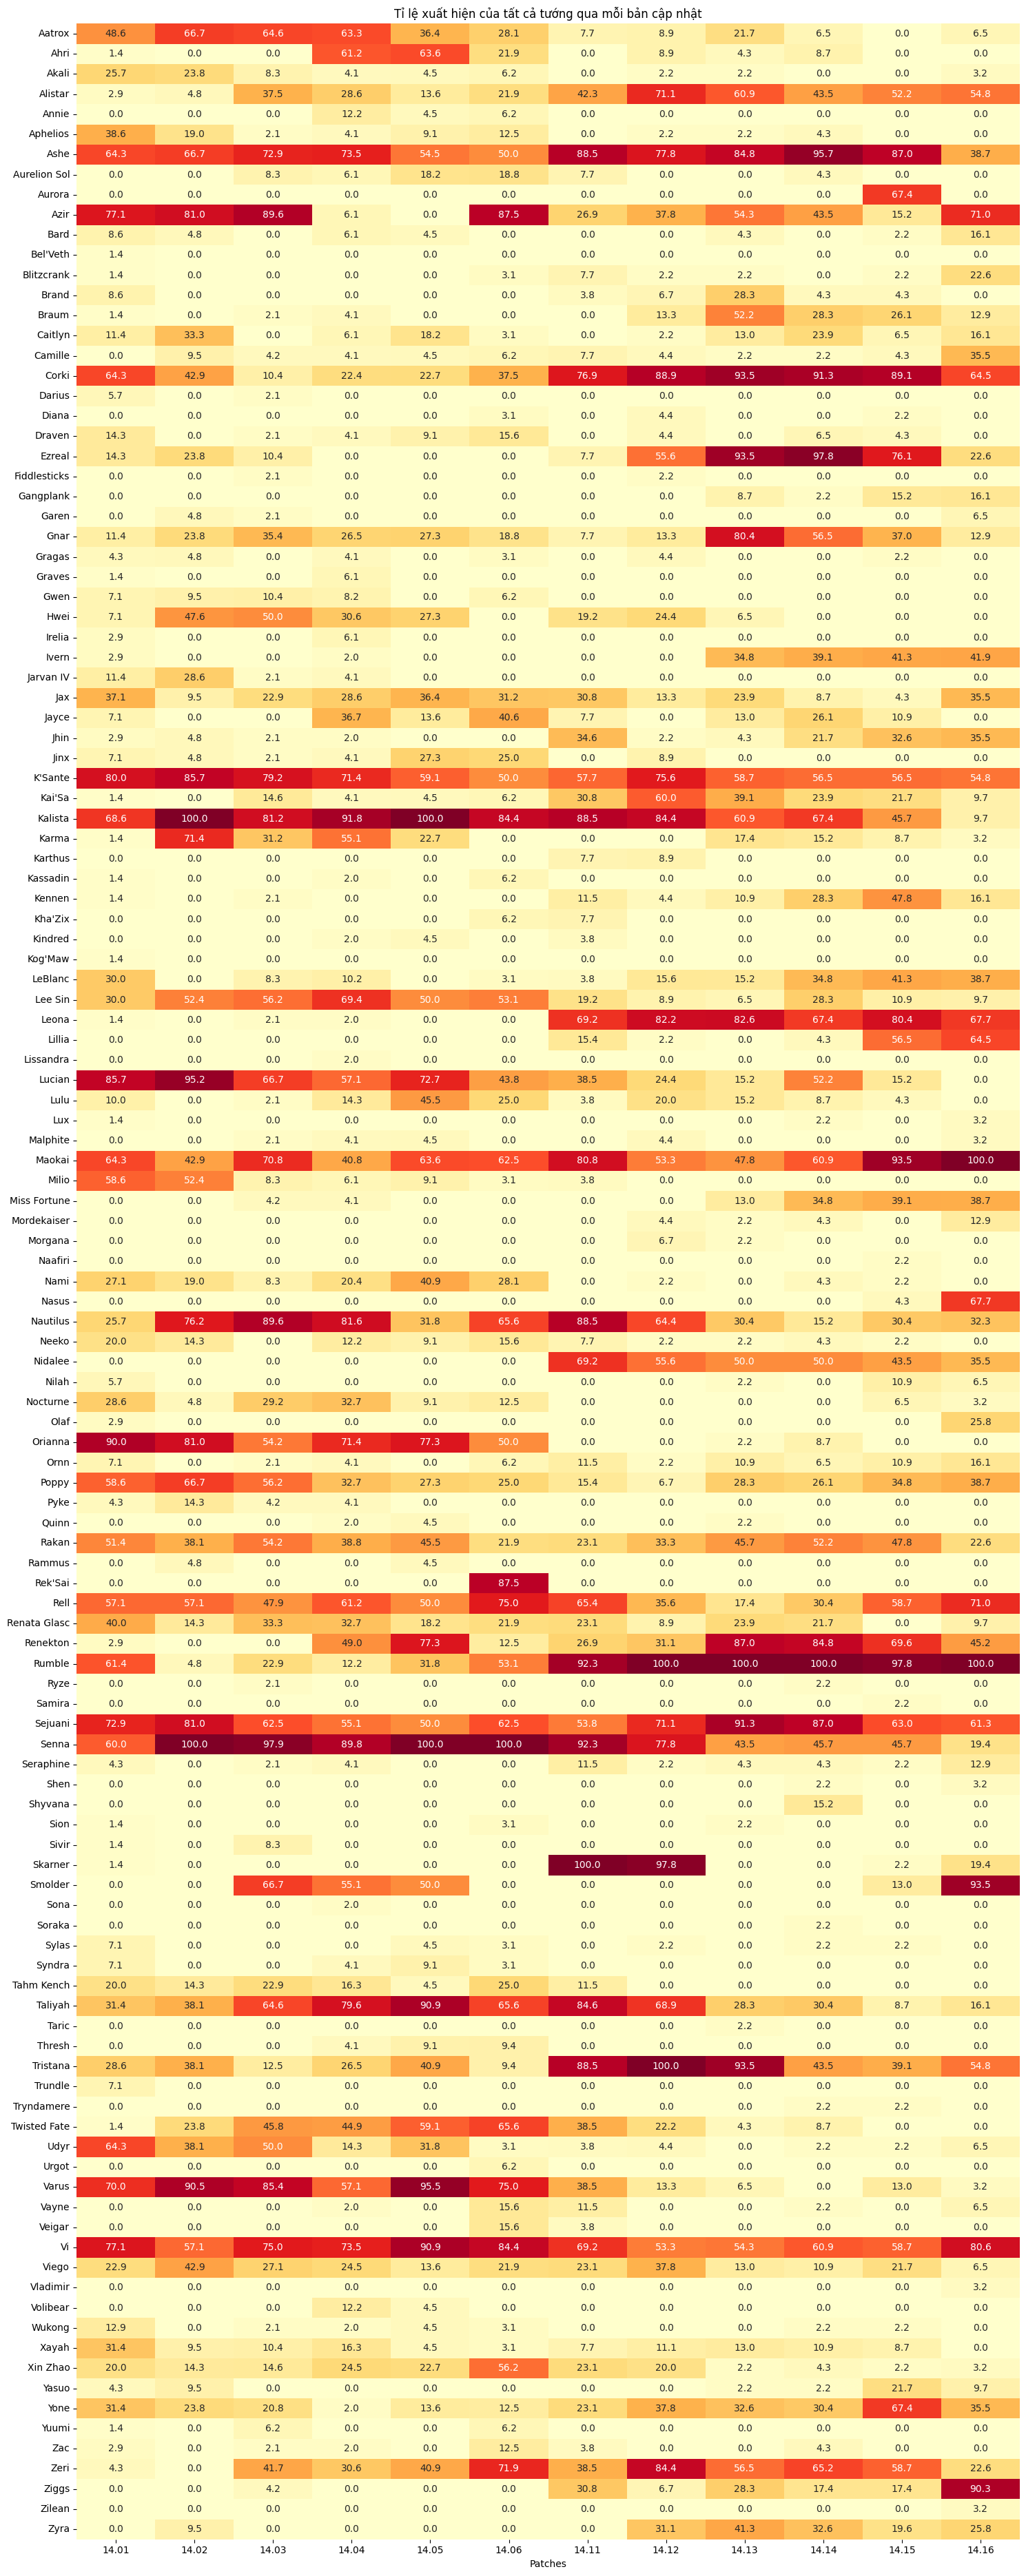

In [23]:
# Lấy danh sách các patch
patches = sorted(lck_data['patch'].unique())

# Lấy danh sách tất cả các tướng xuất hiện trong dataset
all_champions = set()
for i in range(1, 6):
    all_champions.update(lck_data[f'pick{i}'].unique())
    all_champions.update(lck_data[f'ban{i}'].unique())
all_champions = sorted(list(all_champions - {None, np.nan}))  # Loại bỏ các giá trị null

# Tính tỉ lệ xuất hiện cho mỗi tướng ở mỗi patch
heat_data = np.zeros((len(all_champions), len(patches)))

for i, champion in enumerate(all_champions):
    for j, patch in enumerate(patches):
        patch_data = lck_data[lck_data['patch'] == patch]
        heat_data[i, j] = calculate_champion_presence(patch_data, champion)

# Vẽ heatmap
plt.figure(figsize=(15, len(all_champions) * 0.3))  # Điều chỉnh kích thước theo số lượng tướng
sns.heatmap(heat_data,
            xticklabels=patches,
            yticklabels=all_champions,
            cmap='YlOrRd',
            annot=True,
            fmt='.1f',
            cbar=False,
            vmin=0,
            vmax=100)

plt.title("Tỉ lệ xuất hiện của tất cả tướng qua mỗi bản cập nhật")
plt.xlabel("Patches")
plt.ylabel("")

# Điều chỉnh layout để tránh bị cắt
plt.tight_layout()
plt.show()

#### c. Thống kê top 10 tướng cấm đầu/chọn đầu

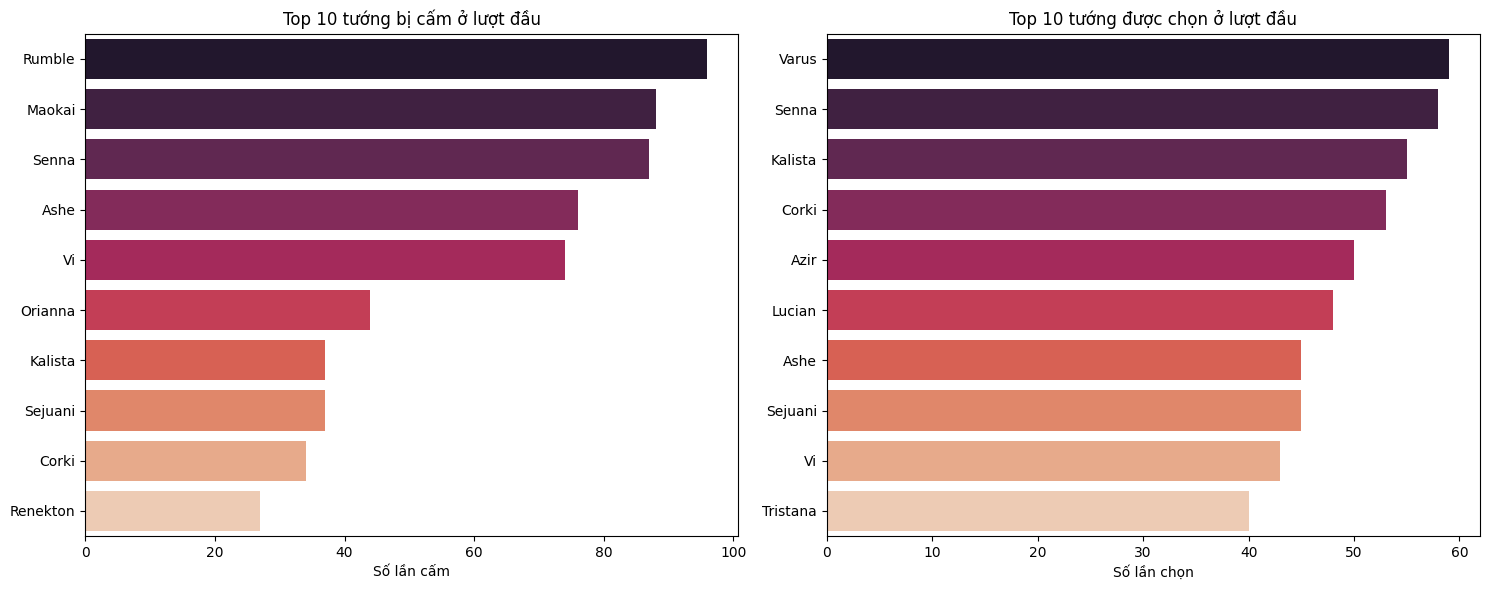

In [24]:
# Phân tích first ban rate
first_ban_counts = lck_data['ban1'].value_counts().head(10)

# Phân tích first pick rate
first_pick_counts = lck_data['pick1'].value_counts().head(10)

# Tạo subplot với 2 biểu đồ cạnh nhau
plt.figure(figsize=(15, 6))

# Biểu đồ First Ban Rate
plt.subplot(1, 2, 1)
sns.barplot(x=first_ban_counts.values, 
           y=first_ban_counts.index, 
           hue=first_ban_counts.index,
           legend=False,
           palette="rocket")
plt.title("Top 10 tướng bị cấm ở lượt đầu")
plt.xlabel("Số lần cấm")
plt.ylabel("")

# Biểu đồ First Pick Rate
plt.subplot(1, 2, 2)
sns.barplot(x=first_pick_counts.values, 
           y=first_pick_counts.index,
           hue=first_pick_counts.index,
           legend=False,
           palette="rocket")
plt.title("Top 10 tướng được chọn ở lượt đầu")
plt.xlabel("Số lần chọn")
plt.ylabel("")

# Điều chỉnh layout
plt.tight_layout()
plt.show()

#### d. Tìm các combo tướng thường được pick chung với nhau

In [25]:
# Hàm tìm các cặp tướng thường được pick cùng nhau
from itertools import combinations

def find_champion_pairs(df):
    pick_pairs = []
    for _, row in df.iterrows():
        picks = [row[f'pick{i}'] for i in range(1, 6)]
        pairs = list(combinations(picks, 2))
        pick_pairs.extend(pairs)
    return pd.Series(pick_pairs).value_counts().head(10)

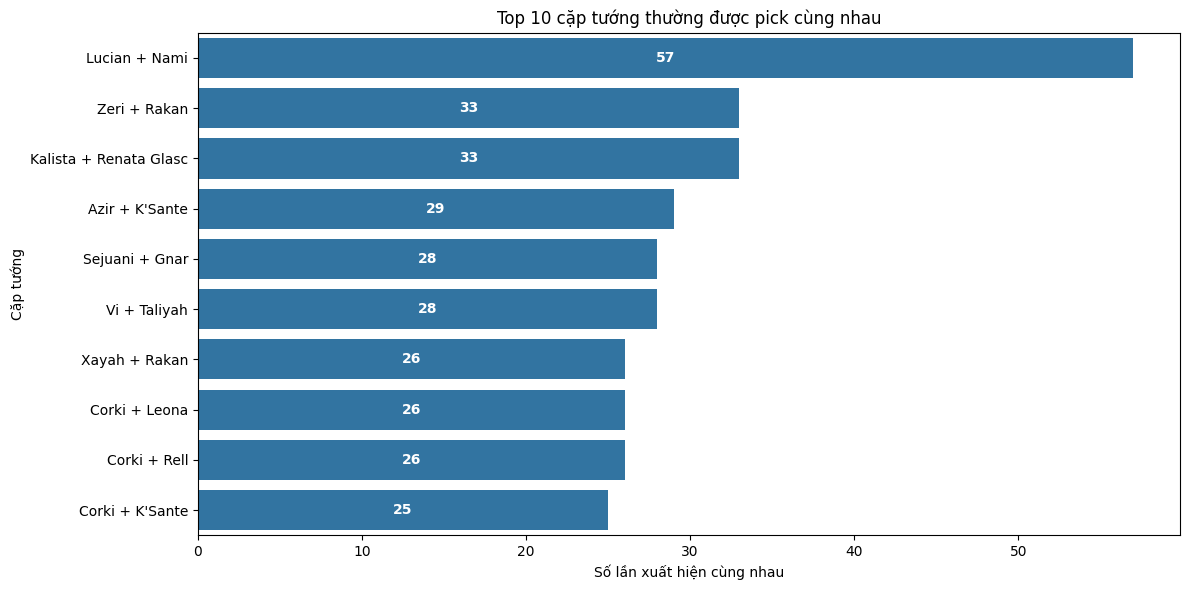

In [26]:
# Tìm các cặp tướng được pick cùng nhau 
champion_pairs = find_champion_pairs(lck_data)

# Tạo figure
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=champion_pairs.values,
    y=[f"{pair[0]} + {pair[1]}" for pair in champion_pairs.index]
)

# Thêm nhãn giá trị cho mỗi cột
for i, v in enumerate(champion_pairs.values):
    ax.text(
        v/2,                          # vị trí theo trục x
        i,                            # vị trí theo trục y 
        f"{v}",                       # nhãn giá trị
        color="white",                # màu giá trị
        fontweight="bold",            # in đậm giá trị
        ha="center",                  # căn giữa cột
        va="center"                   # căn giữa cột
    )

plt.title("Top 10 cặp tướng thường được pick cùng nhau")
plt.xlabel("Số lần xuất hiện cùng nhau")
plt.ylabel("Cặp tướng")

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

### 4. Thống kê về KDA/combat
- combat_cols = ['kills', 'deaths', 'assists', 'doublekills', 'triplekills', 'quadrakills', 'pentakills', 'firstblood', 'team kpm', 'ckpm']

In [27]:
# Copy df để tiện sửa đổi 
lck_data = lck_df.copy()

#### Tỉ lệ ăn chiến công đầu của mỗi đội

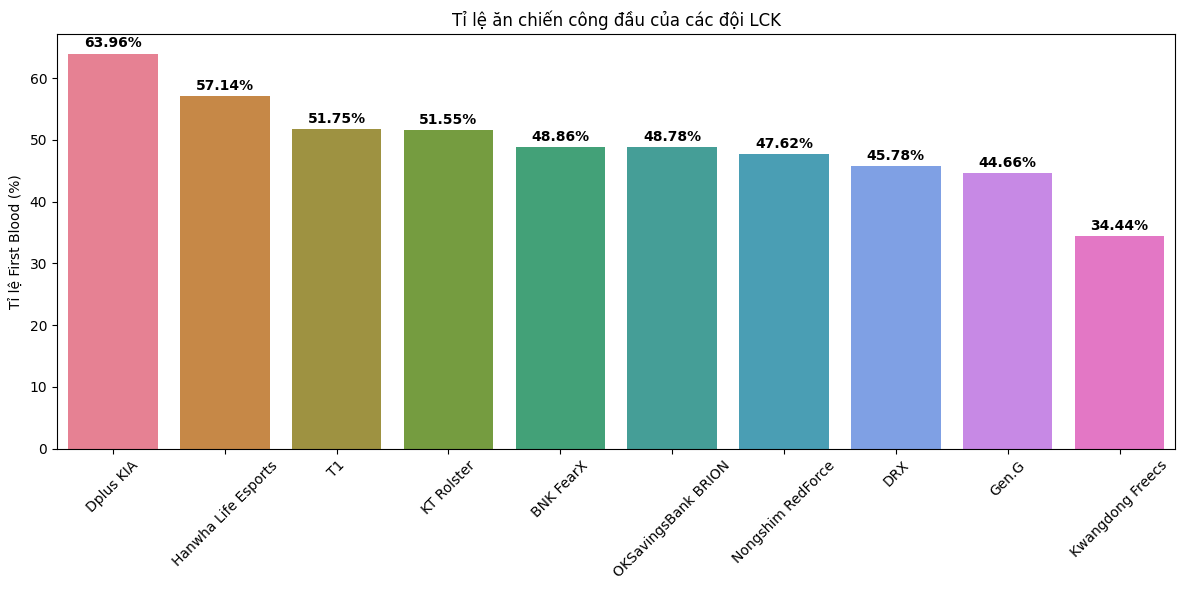

In [28]:
# Tính số lần ăn chiến công đầu theo từng đội
firstblood_stats = (
    lck_data.groupby("teamname")
    .agg({
        "firstblood": ["count", "sum"]  
    })
    .droplevel(0, axis=1) 
)

# Tính tỉ lệ ăn chiến công đầu
firstblood_stats["fb_rate"] = (firstblood_stats["sum"] / firstblood_stats["count"] * 100).round(2)

# Sắp xếp theo rate giảm dần
firstblood_stats = firstblood_stats.sort_values("fb_rate", ascending=False)

# Tạo figure
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=firstblood_stats.index,
    hue=firstblood_stats.index,
    y=firstblood_stats["fb_rate"],
    palette="husl",
    legend=False
)

# thêm nhãn giá trị
for i, v in enumerate(firstblood_stats["fb_rate"]):
    ax.text(
        i,                              
        v + 0.5,                     
        f"{v}%",                     
        ha="center",               
        va="bottom",                  
        fontweight="bold"         
    )

plt.title("Tỉ lệ ăn chiến công đầu của các đội LCK")
plt.xlabel("")
plt.ylabel("Tỉ lệ First Blood (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 5. Thống kê về mục tiêu lớn
- objectives_cols = ['firstdragon', 'dragons', 'opp_dragons', 'elementaldrakes', 'opp_elementaldrakes',
                  'infernals', 'mountains', 'clouds', 'oceans', 'chemtechs', 'hextechs', 'elders',
                  'firstherald', 'heralds', 'firstbaron', 'barons']
- structure_cols = ['firsttower', 'towers', 'opp_towers', 'firstmidtower', 'firsttothreetowers',
                 'turretplates', 'opp_turretplates', 'inhibitors', 'opp_inhibitors']

In [29]:
#Copy df để tiện làm
lck_data = lck_df.copy()

#### a. Thống kê số lượng rồng hạ gục theo từng loại rồng 

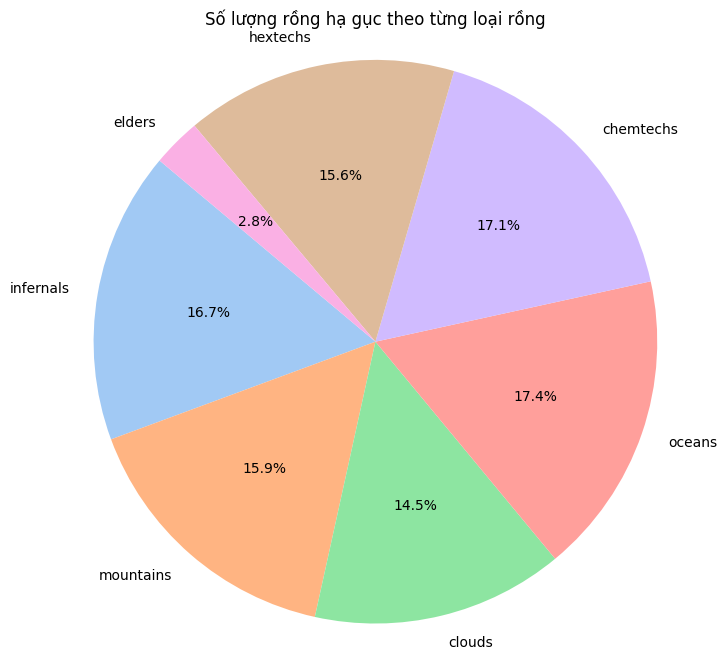

In [30]:
dragon_cols = ['infernals', 'mountains', 'clouds', 'oceans', 'chemtechs', 'hextechs', 'elders']

# Đếm số lượng từng loại rồng
dragon_counts = lck_data[dragon_cols].sum()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    dragon_counts,
    labels=dragon_cols,
    autopct='%1.1f%%',  
    startangle=140,     
    colors=sns.color_palette('pastel')  
)

# Set the title of the pie chart
plt.title("Số lượng rồng hạ gục theo từng loại rồng")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

#### b. Quan hệ giữa các mục tiêu lớn đầu game với tỉ lệ thắng ván đấu

##### Code này để kiểm tra tính đúng đắn của cách tính tỉ lệ thắng (vì ng làm ra không tin vào mắt mình :D)

In [31]:
# Lấy 3 game ID đầu tiên
first_three_games = lck_data['gameid'].unique()[:3]
first_three_data = lck_data[lck_data['gameid'].isin(first_three_games)]

# Tính tỉ lệ thắng với First Dragon cho 3 trận đầu
win_with_fd = (first_three_data[first_three_data['firstdragon'] == 1]['result'] == 1).mean() * 100
n_with_fd = len(first_three_data[first_three_data['firstdragon'] == 1])

win_without_fd = (first_three_data[first_three_data['firstdragon'] == 0]['result'] == 1).mean() * 100
n_without_fd = len(first_three_data[first_three_data['firstdragon'] == 0])

# In thông tin chi tiết từng trận
print("Detailed Game Information:")
for game_id in first_three_games:
    game_data = first_three_data[first_three_data['gameid'] == game_id]
    print(f"\nGame ID: {game_id}")
    for _, team in game_data.iterrows():
        print(f"Team: {team['teamname']}")
        print(f"First Dragon: {team['firstdragon']}")
        print(f"Result: {team['result']}")
        print("---")

print("\nFirst Dragon Stats (First 3 Games):")
print(f"With First Dragon (n={n_with_fd}): {win_with_fd:.1f}% win rate")
print(f"Without First Dragon (n={n_without_fd}): {win_without_fd:.1f}% win rate")

Detailed Game Information:

Game ID: LOLTMNT02_22165
Team: DRX
First Dragon: 0.0
Result: 0
---
Team: Nongshim RedForce
First Dragon: 1.0
Result: 1
---

Game ID: LOLTMNT02_21206
Team: DRX
First Dragon: 1.0
Result: 0
---
Team: Nongshim RedForce
First Dragon: 0.0
Result: 1
---

Game ID: LOLTMNT02_22225
Team: Gen.G
First Dragon: 1.0
Result: 0
---
Team: T1
First Dragon: 0.0
Result: 1
---

First Dragon Stats (First 3 Games):
With First Dragon (n=3): 33.3% win rate
Without First Dragon (n=3): 66.7% win rate


##### Tính toán và vẽ biểu đồ các mục tiêu lớn đầu

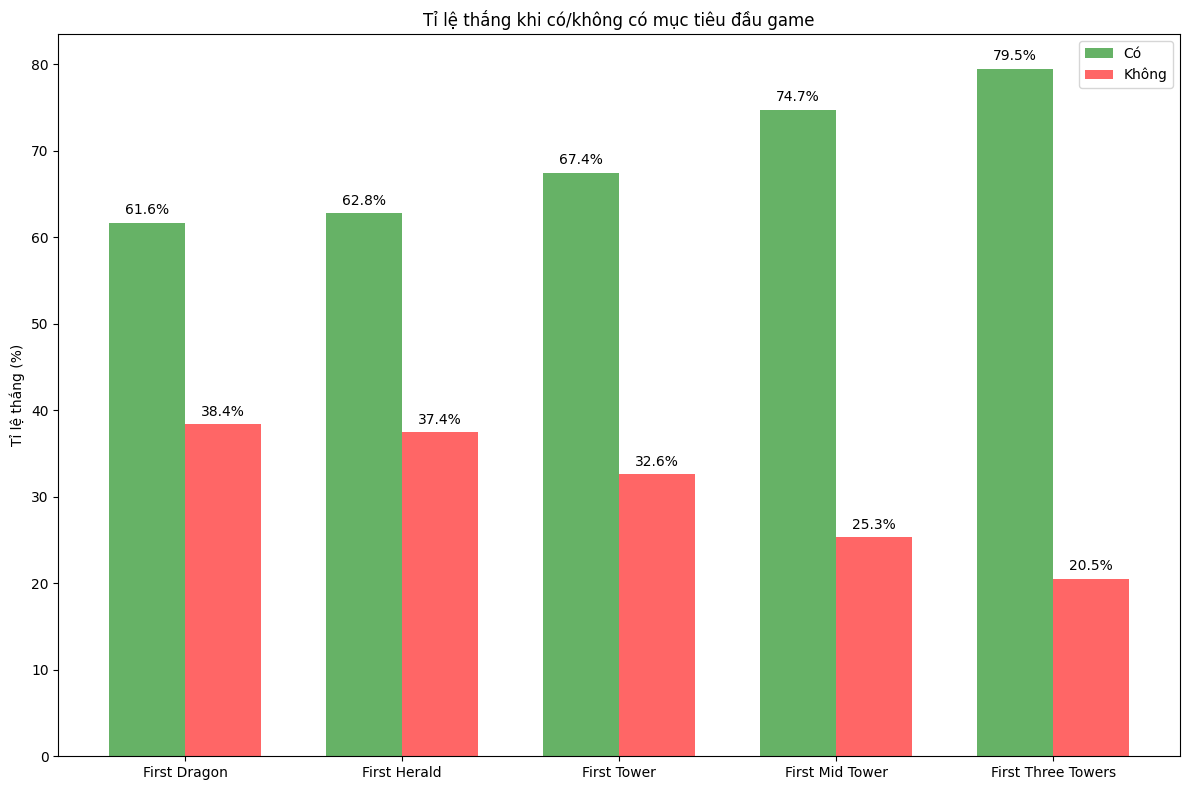

In [32]:
# Tạo figure với 2 subplots
fig, ax1 = plt.subplots(figsize=(12, 8))

# List các objective cần phân tích
objectives = ['firstdragon', 'firstherald', 'firsttower', 'firstmidtower', 'firsttothreetowers']
objective_names = ['First Dragon', 'First Herald', 'First Tower', 'First Mid Tower', 'First Three Towers']

# 1. Phân tích tỉ lệ thắng
win_rates = []
for obj in objectives:
    # Tính tỉ lệ thắng khi lấy được objective
    win_rate_with = (lck_data[lck_data[obj] == 1]['result'] == 1).mean() * 100
    # Tính tỉ lệ thắng khi không lấy được objective
    win_rate_without = (lck_data[lck_data[obj] == 0]['result'] == 1).mean() * 100
    win_rates.append([win_rate_with, win_rate_without])

# Vẽ grouped bar chart cho tỉ lệ thắng
x = np.arange(len(objectives))
width = 0.35

ax1.bar(x - width/2, [rate[0] for rate in win_rates], width, label='Có', color='green', alpha=0.6)
ax1.bar(x + width/2, [rate[1] for rate in win_rates], width, label='Không', color='red', alpha=0.6)

ax1.set_ylabel('Tỉ lệ thắng (%)')
ax1.set_title('Tỉ lệ thắng khi có/không có mục tiêu đầu game')
ax1.set_xticks(x)
ax1.set_xticklabels(objective_names)
ax1.legend()

# Thêm giá trị lên các cột
for i in range(len(objectives)):
    ax1.text(i - width/2, win_rates[i][0] + 1, f'{win_rates[i][0]:.1f}%', ha='center')
    ax1.text(i + width/2, win_rates[i][1] + 1, f'{win_rates[i][1]:.1f}%', ha='center')

# Điều chỉnh layout
plt.tight_layout()
plt.show()


##### Hàm tính toán và vẽ biểu đồ tỉ lệ thắng cho sâu và giáp trụ

In [33]:
def plot_win_rates(lck_data, column):
    """
    Vẽ biểu đồ tỉ lệ thắng và số ván thắng theo một cột chỉ định.

    Tham số:
        lck_data (DataFrame): Dữ liệu chứa thông tin trận đấu.
        column (str): Tên cột để tính toán (vd: 'turretplates', 'void_grubs').
    """
    win_rates = []
    win_counts = []

    # Tính số lượng trận đấu và tỉ lệ thắng cho mỗi giá trị của cột
    for value in range(16):
        wins = len(lck_data[(lck_data[column] == value) & (lck_data['result'] == 1)])
        total = len(lck_data[lck_data[column] == value])
        if total > 0:  # Chỉ tính cho các giá trị có dữ liệu
            win_rate = (wins / total) * 100  # Tính tỉ lệ thắng (%)
            win_rates.append(win_rate)
            win_counts.append(wins)

    # Tạo figure với kích thước lớn hơn
    plt.figure(figsize=(12, 6))

    # Vẽ biểu đồ với hai trục y
    ax1 = plt.gca()
    ax2 = ax1.twinx()

    # Vẽ cột cho số ván thắng
    bars = ax1.bar(range(len(win_counts)), win_counts, color='skyblue', alpha=0.7, label='Số ván thắng')

    # Vẽ đường cho tỉ lệ thắng
    line = ax2.plot(range(len(win_rates)), win_rates, 
                    color='red', linewidth=2, 
                    marker='o', label='Tỉ lệ thắng')

    # Thêm giá trị lên các cột và đường
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, height * 0.1, str(int(height)),
                 ha='center', va='bottom', color='black', fontweight='bold')

        x_offset = 0
        y_offset = 1

        if i < len(win_rates) - 1:
            if i > 0:
                if win_rates[i] > win_rates[i - 1] and win_rates[i] > win_rates[i + 1]:
                    y_offset = 1
                elif win_rates[i] < win_rates[i - 1] and win_rates[i] < win_rates[i + 1]:
                    y_offset = -5
                elif win_rates[i] < win_rates[i - 1] and win_rates[i] > win_rates[i + 1]:
                    x_offset = 0.2
                    y_offset = 1
                elif win_rates[i] > win_rates[i - 1] and win_rates[i] < win_rates[i + 1]:
                    x_offset = -0.2
                    y_offset = 1
            else:
                if win_rates[i] < win_rates[i + 1]:
                    x_offset = -0.2
                else:
                    x_offset = 0.2
        else:
            x_offset = 0.2

        ax2.text(i + x_offset, win_rates[i] + y_offset,
                 f'{win_rates[i]:.1f}%',
                 ha='center', va='bottom', color='red', fontweight='bold')

    # Tùy chỉnh biểu đồ
    ax1.set_title(f'Tỉ lệ thắng và số ván thắng theo {column}')
    ax1.set_xlabel(f'{column}')
    ax1.set_ylabel('Số ván thắng', color='skyblue', fontweight='bold', 
               rotation=-90, labelpad=15)
    ax2.set_ylabel('Tỉ lệ thắng (%)', color='red', fontweight='bold', 
               rotation=-90, labelpad=15)
    ax2.set_ylim(0, 100)
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Kết hợp các legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.tight_layout()
    plt.show()


- Số sâu hư không

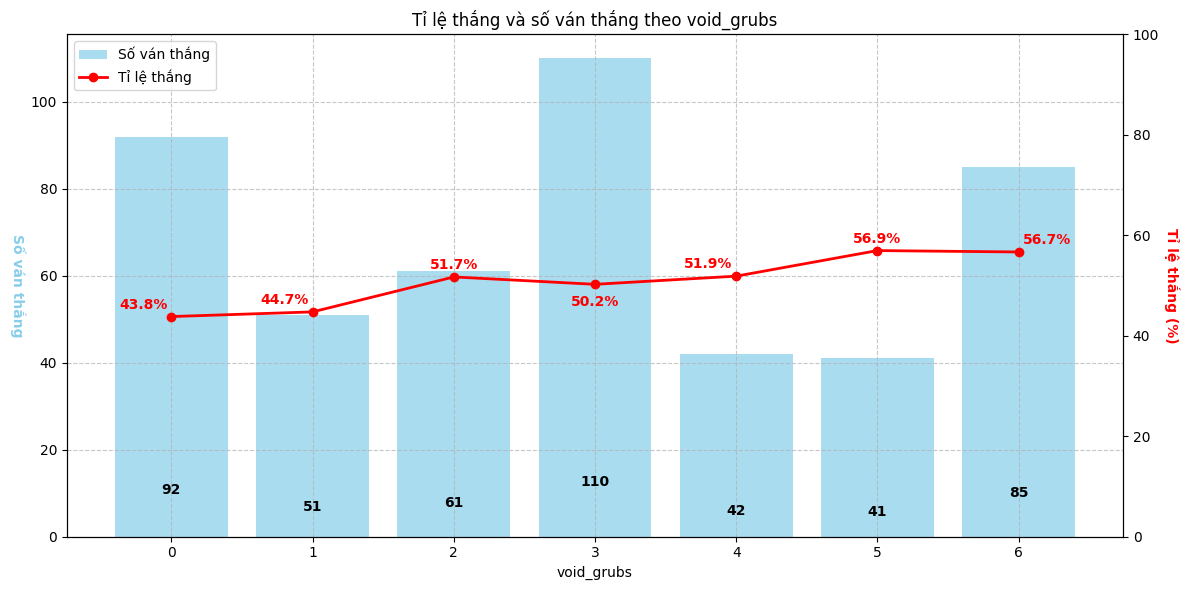

In [34]:
plot_win_rates(lck_data,'void_grubs')

- Số lớp giáp trụ

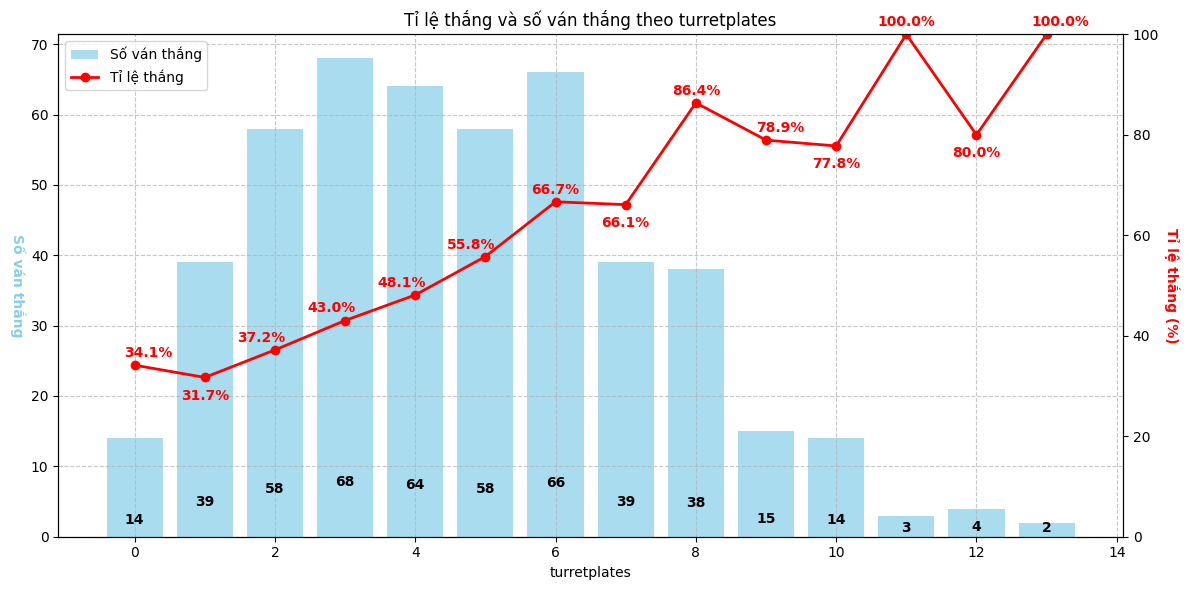

In [35]:
plot_win_rates(lck_data,'turretplates')

### 6. Thống kê về tầm nhìn
- vision_cols = ['wardsplaced', 'wpm', 'wardskilled', 'wcpm', 'controlwardsbought', 'visionscore', 'vspm']

In [36]:
lck_data = lck_df.copy()

In [37]:
vision_cols = ['wardsplaced', 'wpm', 'wardskilled', 'wcpm', 'controlwardsbought', 'visionscore', 'vspm', 'gamelength']

#### a. Các yếu tố có sức ảnh hưởng lên giá trị 'visionscore'

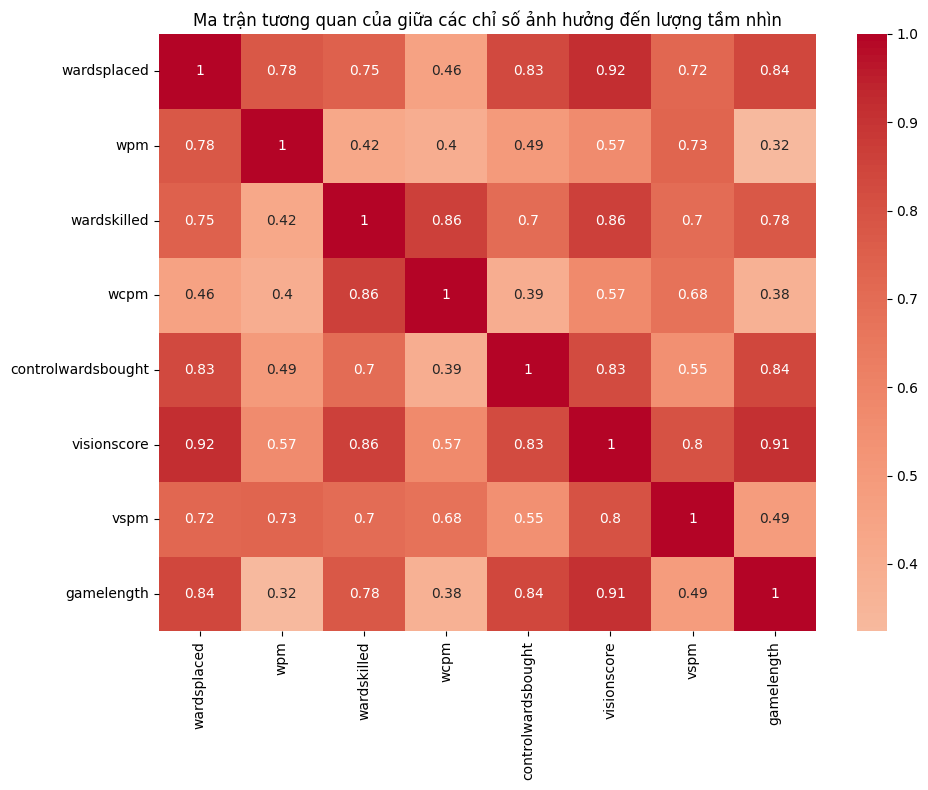

In [38]:
# 1. Tính ma trận tương quan để có cái nhìn sơ bộ
vision_corr = lck_data[vision_cols].corr()

# 2. Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(vision_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận tương quan của giữa các chỉ số ảnh hưởng đến lượng tầm nhìn')
plt.tight_layout()
plt.show()

Heatmap theo visionscore

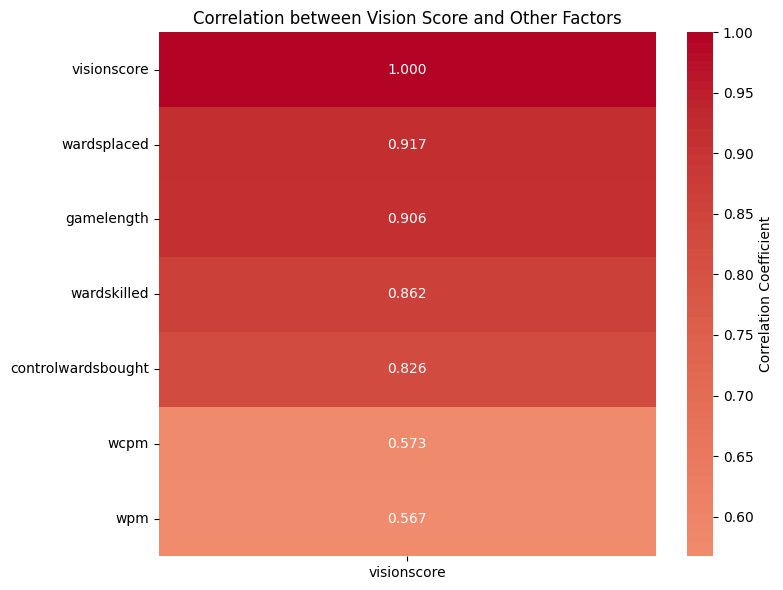

In [39]:
# Lấy các biến liên quan đến vision trừ visionscore và vspm
vision_factors = ['wardsplaced', 'wpm', 'wardskilled', 'wcpm', 'controlwardsbought', 'gamelength']

# Tạo subset của dữ liệu chỉ với visionscore và các yếu tố ảnh hưởng
correlation_data = lck_data[vision_factors + ['visionscore']]
correlation_matrix = correlation_data.corr()[['visionscore']].sort_values(by='visionscore', ascending=False)

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True,           # Hiển thị giá trị số
            cmap='coolwarm',      # Màu sắc
            center=0,             # Giá trị trung tâm của colormap
            fmt='.3f',           # Format số thập phân
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation between Vision Score and Other Factors')
plt.tight_layout()
plt.show()

#### b. Thống kê số lượng mắt cắm, mẳt tiêu diệt và mắt kiểm soát đã mua của đội DPlus KIA

- Mỗi ván đấu

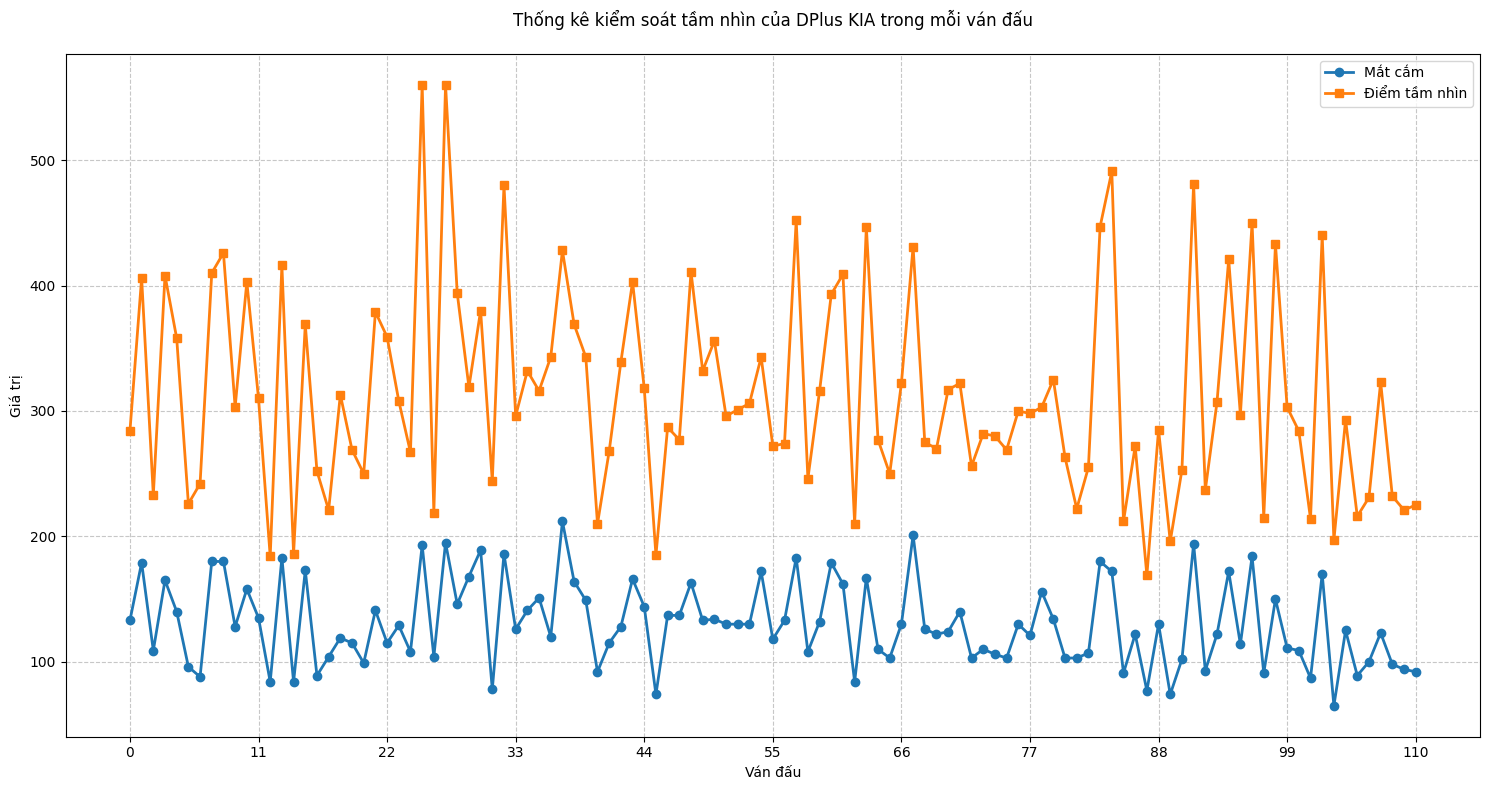

In [40]:
# Lọc dữ liệu chỉ của DPlus KIA
dplus_data = lck_data[lck_data['teamname'] == 'Dplus KIA']

# Tạo DataFrame với các thông tin cần thiết
vision_stats = dplus_data[['gameid', 'wardsplaced','visionscore']]

# Tạo biểu đồ
plt.figure(figsize=(15, 8))

# Vẽ line plot cho cả 2 chỉ số
plt.plot(range(len(vision_stats)), vision_stats['wardsplaced'], 
         marker='o', label='Mắt cắm', linewidth=2)
plt.plot(range(len(vision_stats)), vision_stats['visionscore'], 
         marker='s', label='Điểm tầm nhìn', linewidth=2)


# Chỉnh sửa đồ thị
plt.title('Thống kê kiểm soát tầm nhìn của DPlus KIA trong mỗi ván đấu', pad=20)
plt.xlabel('Ván đấu')
plt.ylabel('Giá trị')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(range(0, len(vision_stats), max(1, len(vision_stats) // 10)))

plt.tight_layout()
plt.show()

- Trong tháng 8

In [41]:
#Thư viện hỗ trợ xử lý dữ liệu datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [42]:
lck_data = lck_df.copy()

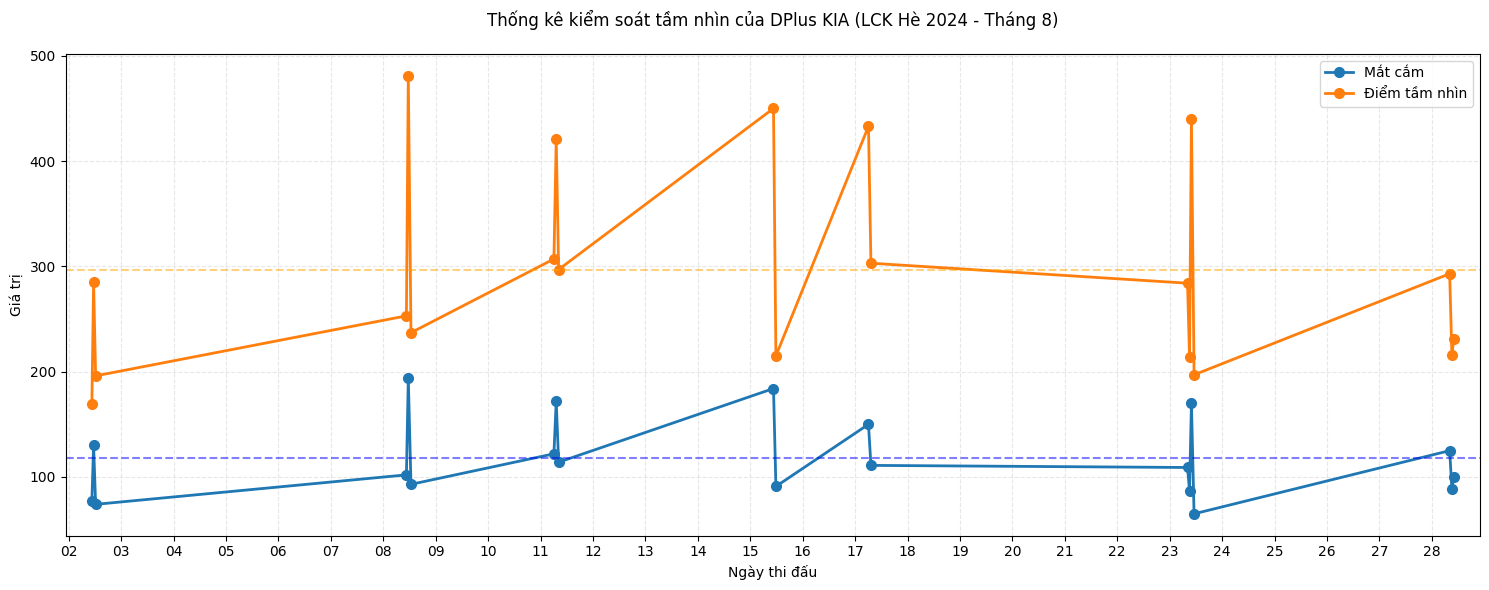

In [43]:
# Lọc dữ liệu và tạo DataFrame duy nhất cho tháng 8 của đội Dplus KIA
dplus_data = (lck_data[lck_data['teamname'] == 'Dplus KIA']
              .assign(date=lambda x: pd.to_datetime(x['date']))
              .query('split == "Summer" and date.dt.month == 8')
              .sort_values('date')
              .copy())

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(15, 6))

# Vẽ 2 đường
ax.plot(dplus_data['date'], dplus_data['wardsplaced'], 
         marker='o', label='Mắt cắm', linewidth=2, markersize=7)
ax.plot(dplus_data['date'], dplus_data['visionscore'], 
         marker='o', label='Điểm tầm nhìn', linewidth=2, markersize=7)

# Thêm đường trung bình
ax.axhline(y=dplus_data['wardsplaced'].mean(), color='blue', 
            linestyle='--', alpha=0.5)
ax.axhline(y=dplus_data['visionscore'].mean(), color='orange', 
            linestyle='--', alpha=0.5)

# Chỉnh sửa trục x
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter('%d'))  # Chỉ hiển thị ngày

# Điều chỉnh vị trí của tick marks để khớp với dữ liệu
ax.set_xlim(dplus_data['date'].min() - pd.Timedelta(days=0.5),
            dplus_data['date'].max() + pd.Timedelta(days=0.5))

# Chỉnh sửa đồ thị
plt.title('Thống kê kiểm soát tầm nhìn của DPlus KIA (LCK Hè 2024 - Tháng 8)', pad=20)
plt.xlabel('Ngày thi đấu')
plt.ylabel('Giá trị')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

<div style="background-color: white; color: #FF0000; padding: 20px;">
<h1>B. Tiền xử lý dữ liệu (Preprocessing)</h1>
</div>

In [2]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler, LabelEncoder

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../Data/LCK_Tournament.csv')

## Bỏ bớt các cột

In [4]:
#Drop columns not important
df = df.drop(['year', 'league', 'datacompleteness', 'split', 'playoffs', 'game', 'patch',
              'side', 'position', 'teamid'], axis=1)

## Feature Engineering

In [5]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Combine all multi kills features into one
# Define the list of multi kills features to combine
multi_kills_features = ["doublekills", "triplekills", "quadrakills", "pentakills"]

# Initialize a new column to hold the combined multi kills
df["multikills"] = 0

# Iterate through each multi kills feature and add its value to the combined column
for feature in multi_kills_features:
    df["multikills"] += df[feature]

# Drop the individual multi kills features as they are now combined
df = df.drop(multi_kills_features, axis=1)


In [7]:
def calculate_team_champion_stats(data):
    """Calculate overall champion statistics for each team regardless of pick order"""
    team_champ_stats = {}
    
    # Get all pick columns
    pick_cols = [f"pick{i}" for i in range(1, 6)]
    
    # Calculate stats for each team-champion combination
    for team in data["teamname"].unique():
        team_data = data[data["teamname"] == team]
        champion_stats = {}
        
        # Combine all picks to get total champion usage
        for pick_col in pick_cols:
            for champ in team_data[pick_col].unique():
                if champ not in champion_stats:
                    champion_stats[champ] = {"games": 0, "wins": 0}
                
                champ_games = team_data[team_data[pick_col] == champ]
                champion_stats[champ]["games"] += len(champ_games)
                champion_stats[champ]["wins"] += champ_games["result"].sum()
        
        team_champ_stats[team] = champion_stats
    
    return team_champ_stats

# Calculate team-champion statistics
team_champion_stats = calculate_team_champion_stats(df)

# Add statistics columns for each pick
for i in range(1, 6):
    pick_col = f"pick{i}"
    winrate_col = f"winrate_{pick_col}"
    count_col = f"count_{pick_col}"
    
    def get_champ_stats(row):
        team_stats = team_champion_stats.get(row["teamname"], {})
        champ_stats = team_stats.get(row[pick_col], {"games": 0, "wins": 0})
        
        games = champ_stats["games"]
        winrate = champ_stats["wins"] / games if games > 0 else 0
        
        return pd.Series({
            winrate_col: winrate,
            count_col: games
        })
    
    df[[ winrate_col, count_col ]] = df.apply(get_champ_stats, axis=1)

# Display example of processed data
print("\nExample of team-champion statistics:")
print(df[["teamname", 
          "pick1", "winrate_pick1", "count_pick1",
          "pick2", "winrate_pick2", "count_pick2"]].head())

# Save processed data
df.to_csv("../Data/processed_for_prediction.csv", index=False)



Example of team-champion statistics:
            teamname   pick1  winrate_pick1  count_pick1     pick2  \
0                DRX  Lucian       0.222222          9.0   Orianna   
1  Nongshim RedForce   Milio       0.250000          8.0      Azir   
2                DRX  Lucian       0.222222          9.0      Nami   
3  Nongshim RedForce   Milio       0.250000          8.0        Vi   
4              Gen.G   Corki       0.843750         32.0  Aphelios   

   winrate_pick2  count_pick2  
0       0.000000          4.0  
1       0.176471         17.0  
2       0.200000          5.0  
3       0.444444          9.0  
4       0.750000         12.0  


In [3]:
import pandas as pd
df = pd.read_csv('../Data/processed_for_prediction.csv')

<div style="background-color: white; color: #FF0000; padding: 20px;">
<h1>C. Xây dựng mô hình (Model)</h1>
</div>

In [1]:
from predictor_new import DraftBasedPredictor
import joblib

Total features: 60
Training features shape: (964, 60)
Features used in training:
- pick1_encoded
- pick2_encoded
- pick3_encoded
- pick4_encoded
- pick5_encoded
- winrate_pick1
- winrate_pick2
- winrate_pick3
- winrate_pick4
- winrate_pick5
- count_pick1
- count_pick2
- count_pick3
- count_pick4
- count_pick5
- kills
- deaths
- assists
- team kpm
- ckpm
- gspd
- gpr
- gamelength
- firstblood
- firstdragon
- dragons
- elementaldrakes
- firstherald
- heralds
- firstbaron
- barons
- firsttower
- firstmidtower
- firsttothreetowers
- turretplates
- earned gpm
- goldat15
- goldat20
- goldat25
- golddiffat15
- golddiffat20
- golddiffat25
- xpdiffat20
- xpdiffat25
- wardsplaced
- visionscore
- wardskilled
- controlwardsbought
- cspm
- minionkills
- monsterkills
- csat15
- csdiffat15
- csat20
- csdiffat20
- csat25
- csdiffat25
- damagetochampions
- damagetakenperminute
- damagemitigatedperminute
=== Initial Model Evaluation ===

Training XGBoost...
XGBoost Accuracy: 0.9793

Classification Repor

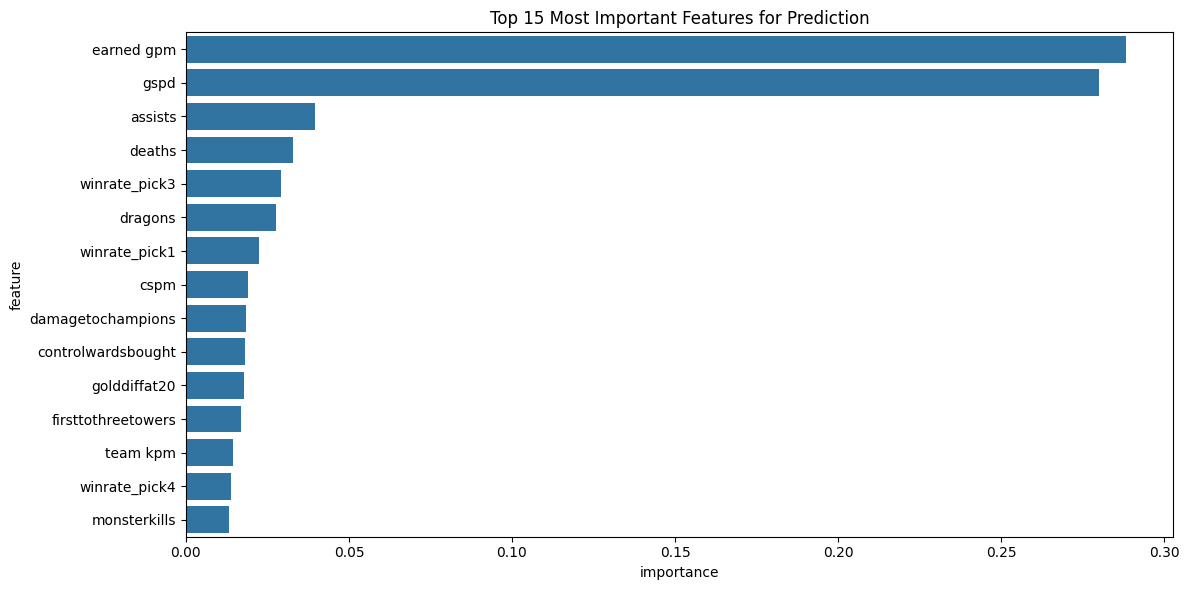

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.9, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [4]:
predictor = DraftBasedPredictor("../Data/processed_for_prediction.csv")
predictor.train_model()


In [2]:
predictor = joblib.load('../Models/draft_predictor_best_model.joblib')

In [3]:
#Example
result = predictor.predict_match(
    team1_name="T1",
    team1_picks=["Twisted Fate", "Tahm Kench", "Senna", "Lee Sin", "Ahri"],
    team2_name="Gen.G",
    team2_picks=["Lucian", "Nami", "K'Sante", "Sejuani", "Tristana"]
)
    
predictor.print_detailed_prediction(result)


Predicting match: T1 vs Gen.G
Model expects 60 features

Processing features for prediction:

Processing features for prediction:


c:\Users\NguyễnHoàngDuy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\NguyễnHoàngDuy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



=== Match Prediction ===

Overall Win Probabilities:
T1: 0.3%
Gen.G: 99.7%

=== Champion Statistics ===

T1 Draft:

Position 1 - Twisted Fate:
  Team Stats (Pick 1) : 0.0% win rate (2 games)
  Team Stats (All Picks)     : 54.5% win rate (11 games)
  Overall Stats (Pick 1) : 0.0% win rate (2 games)
  Overall Stats (All Picks)   : 64.9% win rate (37 games)

Position 2 - Tahm Kench:
  Team Stats (Pick 2) : 100.0% win rate (2 games)
  Team Stats (All Picks)     : 100.0% win rate (8 games)
  Overall Stats (Pick 2) : 66.7% win rate (12 games)
  Overall Stats (All Picks)   : 61.5% win rate (39 games)

Position 3 - Senna:
  Team Stats (Pick 3) : 100.0% win rate (1 games)
  Team Stats (All Picks)     : 77.3% win rate (22 games)
  Overall Stats (Pick 3) : 100.0% win rate (1 games)
  Overall Stats (All Picks)   : 67.0% win rate (88 games)

Position 4 - Lee Sin:
  Team Stats (Pick 4) : 100.0% win rate (1 games)
  Team Stats (All Picks)     : 20.0% win rate (10 games)
  Overall Stats (Pick 4) : 50

In [10]:
#Save model
joblib.dump(predictor, '../Models/draft_predictor_best_model.joblib')
print("Model saved successfully!")


Model saved successfully!
